# Learning Satyrn
learning how to use packages from Python to work on data analysis & mining

##### The Load-in

In [2]:
import datetime as dt
from datetime import datetime
import urllib
# Number manipulation
import numpy as np


# Structure manipulation
import pandas as pd
from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix


# Graphing 
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Stats
import scipy as sp
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency


# Machine Learning & Preprocessing Package
import sklearn
import sklearn.metrics as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

from collections import Counter

import networkx as nx



# Parameters for graphs
%matplotlib inline
rcParams['figure.figsize'] = 10,10
sb.set_style('whitegrid')


# Mac
#df = pd.read_csv('/Users/magicsoccer10/Dropbox/twerk werk/Property Value/07-17.csv')

# Arch
#df = pd.read_csv('C:/Users/scott/Dropbox/twerk werk/cre_values')

# Work
df = pd.read_csv('C:/Users/sstandring/Dropbox/twerk werk/cre_values')

C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


FileNotFoundError: File b'C:/Users/sstandring/Dropbox/twerk werk/cre_values' does not exist

In [186]:
df.head()

Property Address  Property City  Property Zip Code  Sale Date  \
0        180 Montgomery St  San Francisco              94104  1/18/2007   
1  700 Lincoln Village Cir       Larkspur              94939  7/25/2007   
2        2020 Kittredge St       Berkeley              94704   6/8/2007   
3            155 Grand Ave        Oakland              94612  5/11/2007   
4      22301 Foothill Blvd        Hayward              94541  9/20/2007   

   Sale_Price  PropertyType  Cap_Rate  Bldg SF  Floor Area Ratio  \
0   128000000        Office       3.9   304162              17.5   
1    94500000  Multi-Family       4.3   293198               0.4   
2    75000000  Multi-Family       4.2   127830               2.0   
3    72000000        Office       5.6   204336               3.1   
4    66500000        Office       6.6   336000               1.0   

  Building Class Building Condition   BuildingMaterials  Year Built  \
0              A              Other               Steel      1979.0   
1              B              Other           WoodFrame      1978.0   
2              B              Other             Unknown      2006.0   
3              A              Other             Masonry      1990.0   
4              B              Other  ReinforcedConcrete      1958.0   

   Number Of Units  Number Of Tenants  Longitude  Latitude  
0              nan               50.0     -122.4      37.8  
1            342.0                nan     -122.5      37.9  
2              nan                nan     -122.3      37.9  
3              nan               11.0     -122.3      37.8  
4              nan                4.0     -122.1      37.7

In [187]:
# df.duplicated(['Property Address'])
# df.drop_duplicates(['Property Address'])
# filled_df = df.fillna({6:4.5, 14:3})
# filled_df
# df.dropna(axis = 1)# or 2 (col or row))
# fillna(tell col: what value, again)
# drop_df = df.dropna(axis = 1)
# drop_df
df['units'] = df['Number Of Units']
df['sale_date'] = pd.to_datetime(df['Sale Date'])
df['sale_quarter'] = df['sale_date'].dt.quarter
df['sale_quarter'] = df['sale_quarter'].astype('int')
df['log_price'] = np.log(df.Sale_Price)
df['log_sqft'] = np.log(df['Bldg SF'])
df['log_far'] = np.log(df['Floor Area Ratio'])

#### Concatenate/Join
pd.concate([object1,object2], axis = 1) no axis means joining more rows not cols. object.drop([0,2], axis =1) no axis means dropping cols. 0 and 2.
DataFrame.join(object1, object2) object.append(object, ignore_index=True) ignore_index creats new indexes
object.sort_values(by[col.], ascending=[False])

In [188]:
df.groupby(df['PropertyType'])

#### Count Missing Values

In [189]:
df.isnull().sum()

Property Address         0
Property City            0
Property Zip Code        0
Sale Date                0
Sale_Price               0
PropertyType             0
Cap_Rate                 0
Bldg SF                  0
Floor Area Ratio         0
Building Class           0
Building Condition       0
BuildingMaterials        0
Year Built             138
Number Of Units       1926
Number Of Tenants     3681
Longitude                0
Latitude                 0
units                 1926
sale_date                0
sale_quarter             0
log_price                0
log_sqft                 0
log_far                  0
dtype: int64

#### Grouping 

In [190]:
grouped = df.groupby(df['PropertyType'])
grouped.median()

Property Zip Code  Sale_Price  Cap_Rate  Bldg SF  \
PropertyType                                                     
Industrial              94551.0   3320100.0       6.2  24180.0   
Multi-Family            94541.0   1800000.0       5.1   7000.0   
Office                  94404.0   7325000.0       5.8  24385.5   
Retail                  94544.0   1767500.0       6.0   5379.5   
Specialty               94107.0  12750000.0       5.5 117961.0   

              Floor Area Ratio  Year Built  Number Of Units  \
PropertyType                                                  
Industrial                 0.5      1972.0              nan   
Multi-Family               0.8      1959.0              9.0   
Office                     0.9      1975.0              1.5   
Retail                     0.6      1958.0              3.0   
Specialty                  6.5      1990.0              nan   

              Number Of Tenants  Longitude  Latitude  units  sale_quarter  \
PropertyType                                                                
Industrial                  1.0     -122.2      37.6    nan             3   
Multi-Family                1.0     -122.3      37.8    9.0             3   
Office                      6.0     -122.3      37.8    1.5             3   
Retail                      2.0     -122.3      37.8    3.0             3   
Specialty                   2.0     -122.4      37.8    nan             1   

              log_price  log_sqft  log_far  
PropertyType                                
Industrial         15.0      10.1     -0.8  
Multi-Family       14.4       8.9     -0.2  
Office             15.8      10.1     -0.1  
Retail             14.4       8.6     -0.5  
Specialty          16.4      11.7      1.9

# Graphing and Plotting

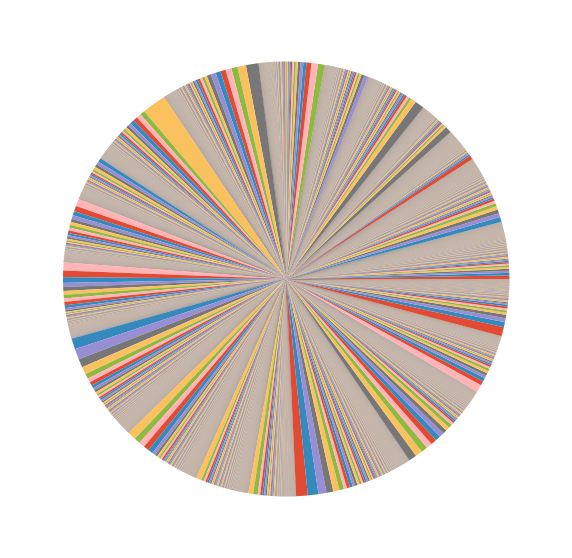

In [191]:
plt.pie(df['Sale_Price'])
plt.show()

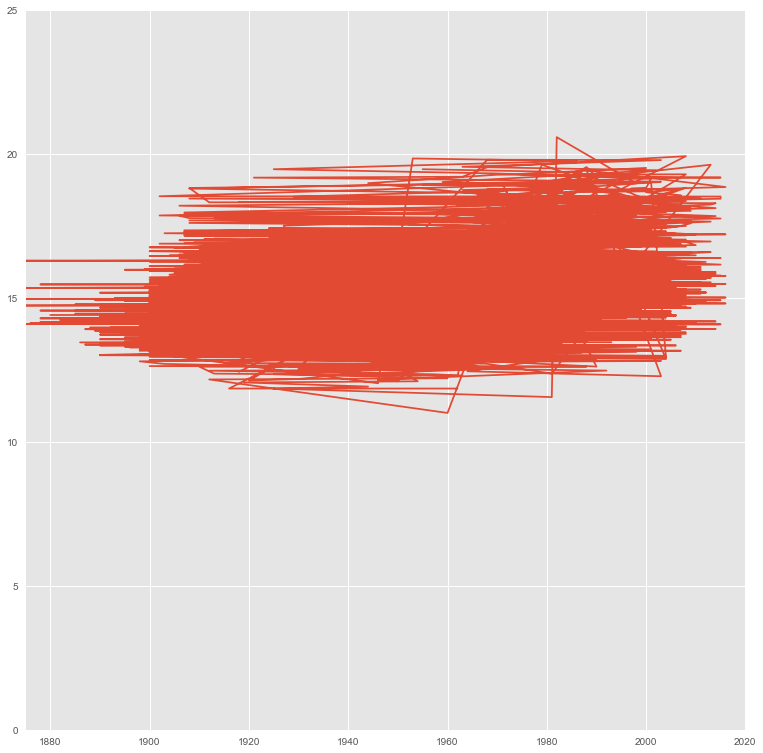

In [279]:
x = df['log_price']
y = df['Year Built']
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1,1])
ax.set_xlim([1875,2020])
ax.set_ylim([0,25])
ax.plot(y,x)

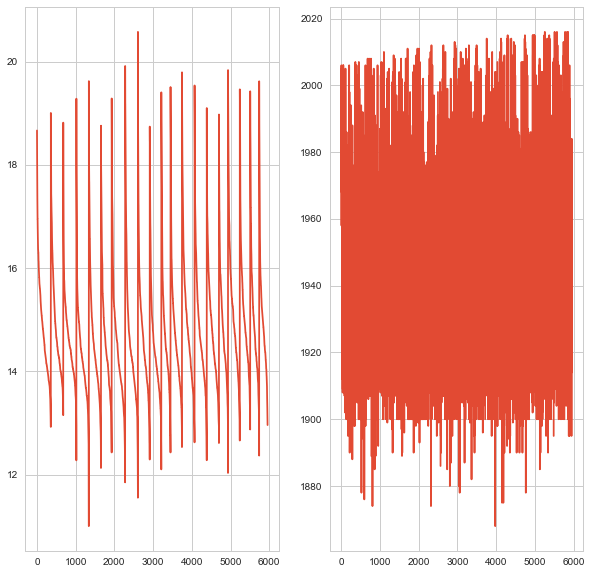

In [193]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(df['log_price'])
ax2.plot(df['Year Built'])

<Container object of 5957 artists>

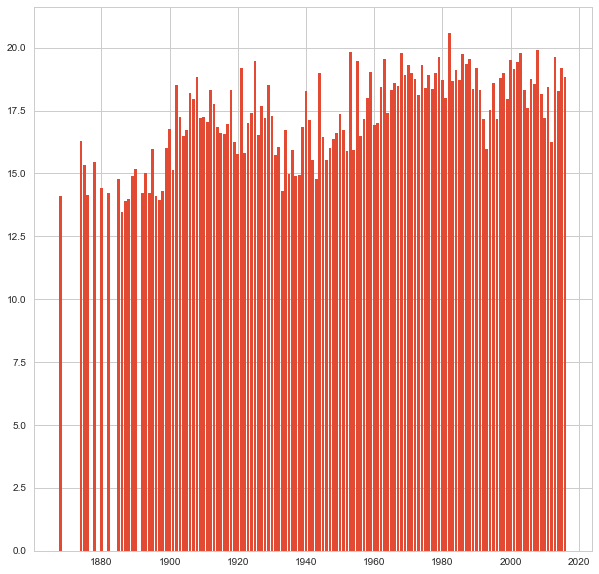

In [194]:
plt.bar(df['Year Built'], df['log_price'])

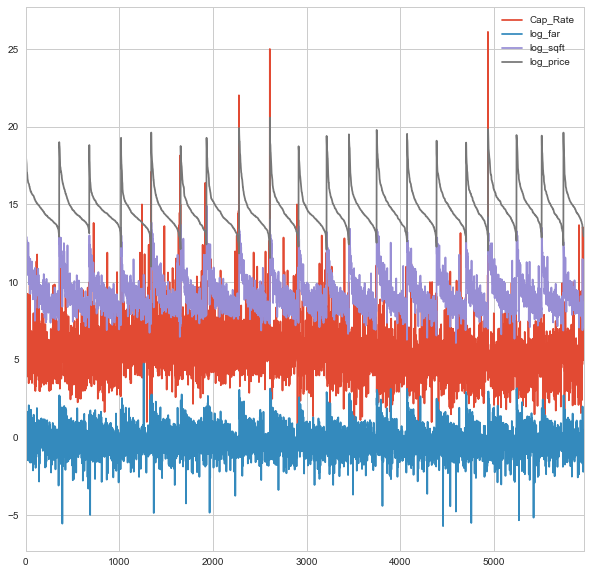

In [195]:
data = df[['Cap_Rate', 'log_far','log_sqft','log_price']]
data.plot()

In [196]:
#Making sale year by extracting last 4 characters from Sale Date 
def remover(s):
    return int(s[-4:])
df['sale_year'] = [remover(s) for s in df['Sale Date']]

Now:
- create price/sqft
- filter to multifamily only
- create the new dataframe
- groupby sale year and zip code
- use mean find average per zip and year
- use unstack:
    - http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html
    - Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

In [278]:
df['ppsf'] = df.Sale_Price / df['Bldg SF']
df['zip'] = df['Property Zip Code']
dx = df.loc[df['PropertyType'] == 'Multi-Family']
ts = dx[['sale_year','ppsf','Property City']]
ts_year = (ts.groupby(['sale_year','Property City'])
    .mean()['ppsf']
    .unstack())
# remove NaN
tsd = ts_year.dropna(axis = 1)

Plot Specs

In [198]:
df['sale_yr_qt'] = str(df['sale_year'])+str(df['sale_quarter'])
ts_year

Property City  Alameda  Alamo  Albany  Antioch  Belmont  Belvedere  \
sale_year                                                            
2007             259.5    nan     nan    143.6    175.8        nan   
2008             197.3    nan   276.4    103.6    181.1        nan   
2009             185.8    nan   215.9      nan    169.4        nan   
2010             271.4    nan   181.0     76.0    259.3        nan   
2011             196.4    nan   165.5     86.3    218.0        nan   
2012             207.1    nan     nan    109.4    253.4        nan   
2013             225.0    nan     nan    103.4    283.2        nan   
2014             217.9    nan     nan    143.8    338.6        nan   
2015             287.7    nan   216.1    160.7    454.2        nan   
2016             348.9  413.8   514.9    128.2    482.2        nan   
2017               nan    nan     nan      nan      nan      827.3   

Property City  Belvedere Tiburon  Benicia  Berkeley  Brentwood      ...       \
sale_year                                                           ...        
2007                       273.7      nan     235.6        nan      ...        
2008                         nan      nan     216.4        nan      ...        
2009                       351.3    208.3     174.6      109.5      ...        
2010                         nan      nan     166.1        nan      ...        
2011                         nan    129.6     219.1      141.6      ...        
2012                         nan      nan     229.9      167.0      ...        
2013                         nan      nan     267.5      145.1      ...        
2014                         nan      nan     263.1      172.1      ...        
2015                         nan    240.3     361.1      224.7      ...        
2016                         nan    246.6     375.6      256.0      ...        
2017                         nan      nan       nan        nan      ...        

Property City  San Rafael  San Ramon  Santa Clara  Sausalito  \
sale_year                                                      
2007                257.0      256.3        224.7      454.5   
2008                261.6        nan        245.6        nan   
2009                205.5        nan        266.3        nan   
2010                177.3        nan        180.9      460.1   
2011                150.6      270.8        216.3      552.5   
2012                265.4        nan        252.9      470.6   
2013                244.6        nan        294.5        nan   
2014                296.5        nan        368.7        nan   
2015                351.7        nan        402.9      792.7   
2016                399.6        nan        491.0      795.9   
2017                364.3        nan        404.3        nan   

Property City  South San Francisco  Sunnyvale  Tiburon  Union City  Vallejo  \
sale_year                                                                     
2007                         230.7      265.5      nan       203.5    157.7   
2008                         150.7      266.4      nan         nan    121.3   
2009                         172.3      209.6      nan         nan      nan   
2010                         133.5      215.7      nan         nan     51.4   
2011                         108.5      238.3      nan         nan     65.3   
2012                         188.1      266.5      nan         nan     76.7   
2013                         222.2      320.1    340.9         nan    101.4   
2014                           nan      401.7    562.5         nan    247.0   
2015                         235.8      613.5      nan         nan    138.6   
2016                         359.5      434.1      nan       298.6    165.8   
2017                         365.8        nan      nan         nan    158.8   

Property City  Walnut Creek  
sale_year                    
2007                  265.6  
2008                  223.2  
2009                  219.1  
2010                  155.2  
2011   

In [199]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


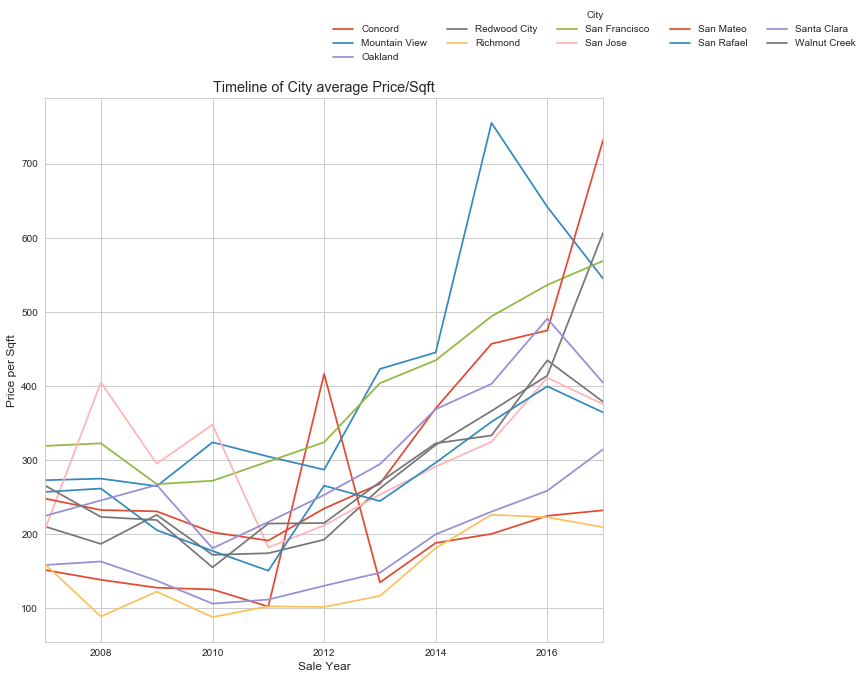

In [200]:
tsd.plot()
plt.style.use('ggplot')
plt.xlabel('Sale Year')
plt.ylabel('Price per Sqft')
plt.title('Timeline of City average Price/Sqft')
plt.legend(title = 'City',loc='lower left', bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True)

group by zip, take the average of each zip's ppsf and create a list 

##### Histograms

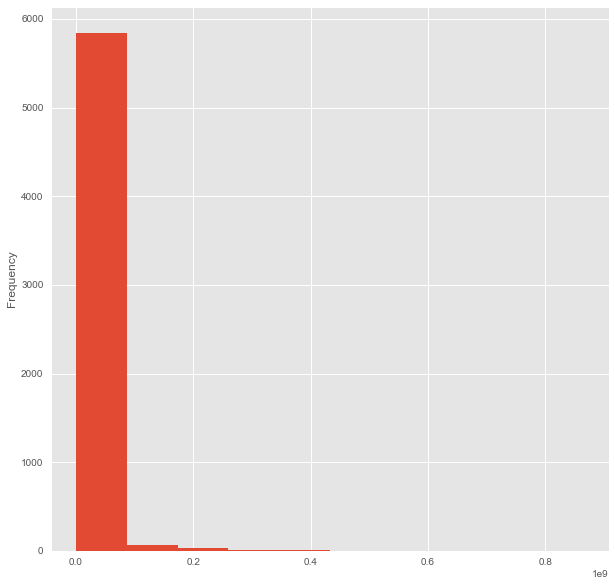

In [201]:
df['Sale_Price'].plot(kind = 'hist')

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


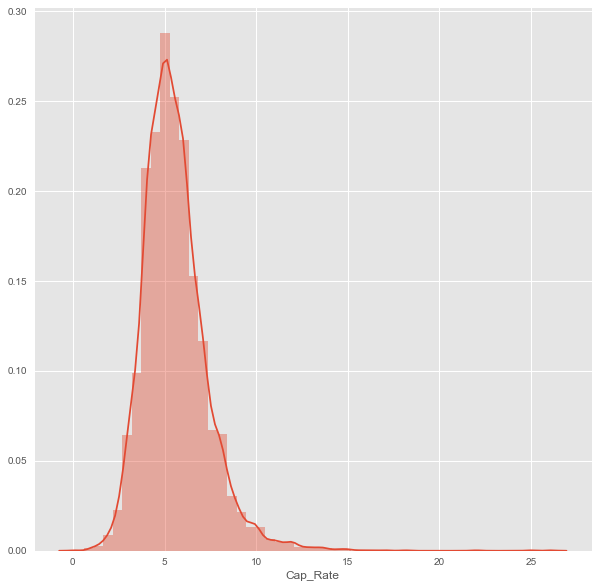

In [202]:
sb.distplot(df['Cap_Rate'])

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


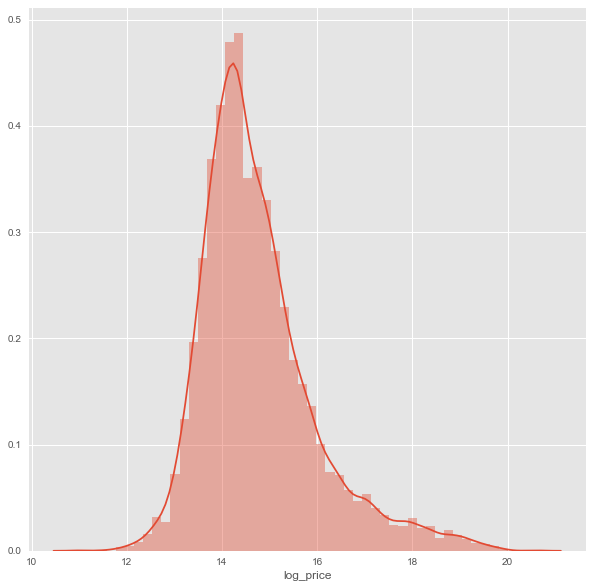

In [203]:
sb.distplot(df.log_price)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


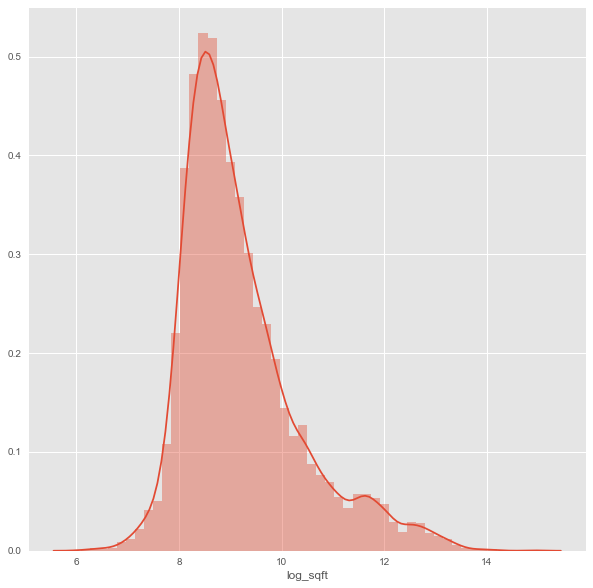

In [204]:
sb.distplot(df.log_sqft)

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


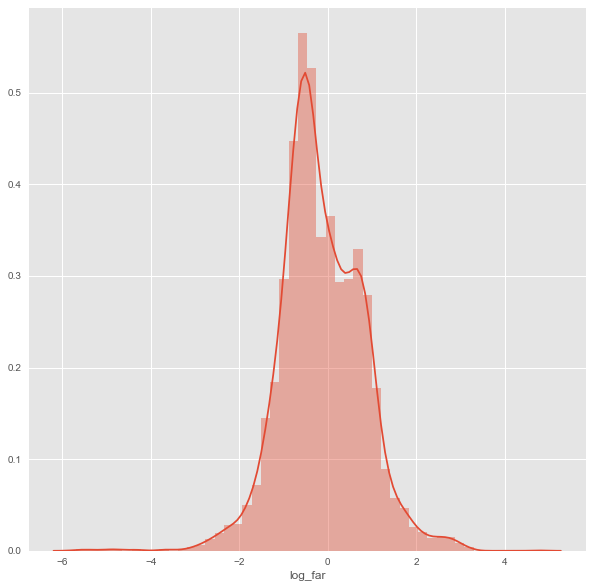

In [205]:
sb.distplot(df.log_far)

##### Scatterplots

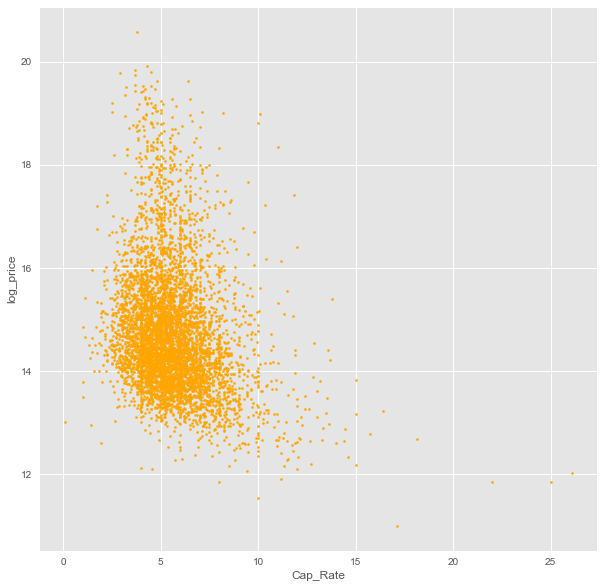

In [206]:
df.plot(kind = 'scatter', x = 'Cap_Rate', y = 'log_price', c = ['orange'], s = 4)

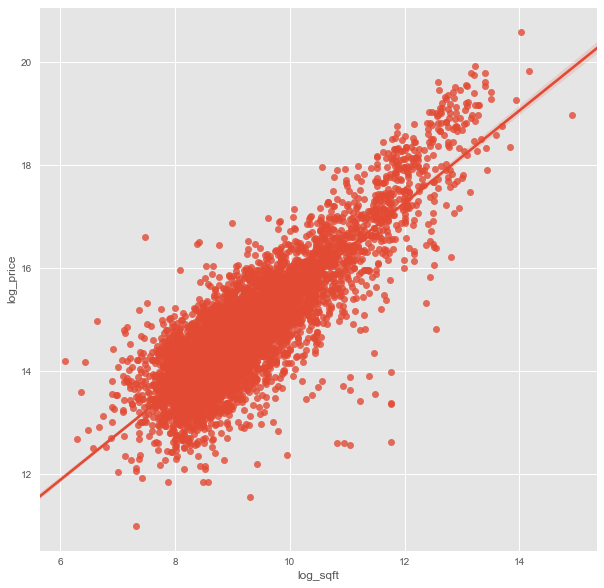

In [207]:
sb.regplot('log_sqft','log_price',df, scatter=True)

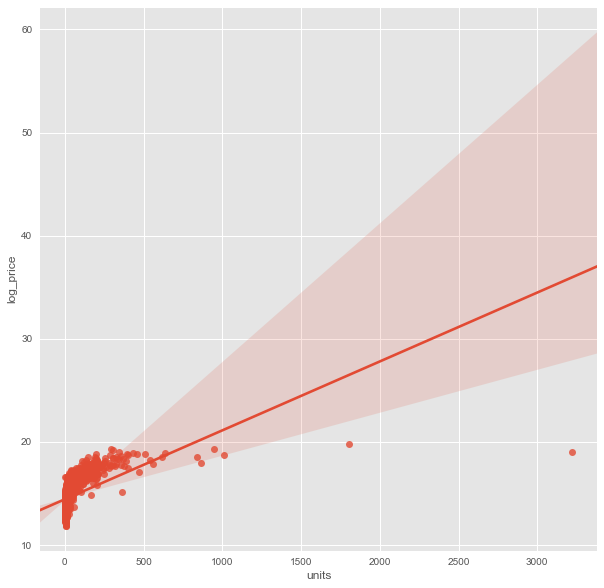

In [208]:
sb.regplot('units', 'log_price',df,scatter=True)


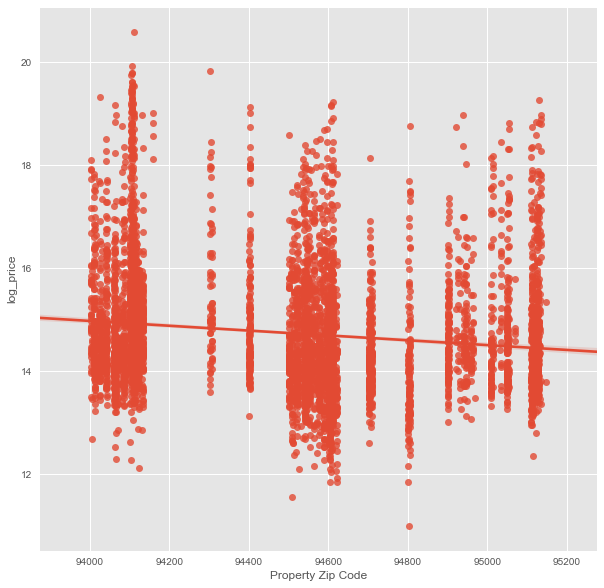

In [209]:
sb.regplot('Property Zip Code','log_price',df,scatter=True)

### Matrices!!!!

In [210]:
df.head()

Property Address  Property City  Property Zip Code  Sale Date  \
0        180 Montgomery St  San Francisco              94104  1/18/2007   
1  700 Lincoln Village Cir       Larkspur              94939  7/25/2007   
2        2020 Kittredge St       Berkeley              94704   6/8/2007   
3            155 Grand Ave        Oakland              94612  5/11/2007   
4      22301 Foothill Blvd        Hayward              94541  9/20/2007   

   Sale_Price  PropertyType  Cap_Rate  Bldg SF  Floor Area Ratio  \
0   128000000        Office       3.9   304162              17.5   
1    94500000  Multi-Family       4.3   293198               0.4   
2    75000000  Multi-Family       4.2   127830               2.0   
3    72000000        Office       5.6   204336               3.1   
4    66500000        Office       6.6   336000               1.0   

  Building Class                        ...                         units  \
0              A                        ...                           nan   
1              B                        ...                         342.0   
2              B                        ...                           nan   
3              A                        ...                           nan   
4              B                        ...                           nan   

   sale_date  sale_quarter  log_price  log_sqft  log_far  sale_year  ppsf  \
0 2007-01-18             1       18.7      12.6      2.9       2007 420.8   
1 2007-07-25             3       18.4      12.6     -0.9       2007 322.3   
2 2007-06-08             2       18.1      11.8      0.7       2007 586.7   
3 2007-05-11             2       18.1      12.2      1.1       2007 352.4   
4 2007-09-20             3       18.0      12.7     -0.0       2007 197.9   

     zip                                         sale_yr_qt  
0  94104  0       2007\n1       2007\n2       2007\n3   ...  
1  94939  0       2007\n1       2007\n2       2007\n3   ...  
2  94704  0       2007\n1       2007\n2       2007\n3   ...  
3  94612  0       2007\n1       2007\n2       2007\n3   ...  
4  94541  0       2007\n1       2007\n2       2007\n3   ...  

[5 rows x 27 columns]

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


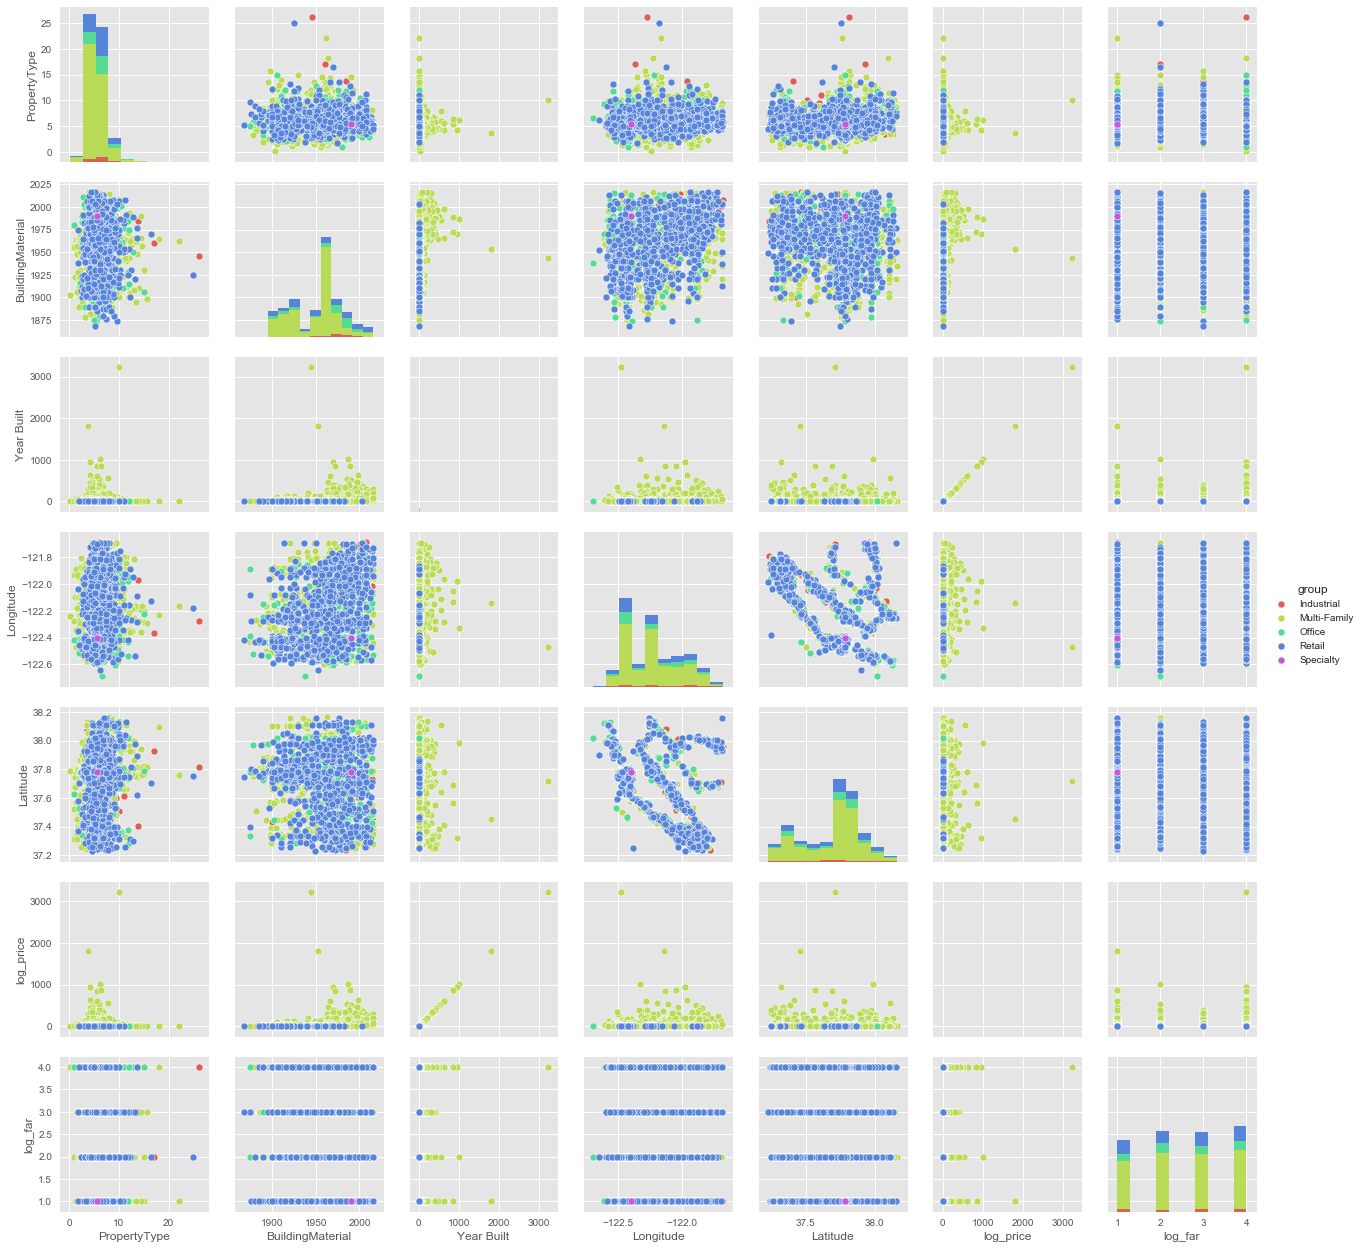

In [211]:
pv_df = pd.DataFrame((df.ix[:,(3,6,9,10,11,12,13,15,16,17,18,19)].values), columns = ['Property Zip Code','PropertyType','Cap_Rate','Building Class','Building Condition','BuildingMaterial','Year Built','Longitude','Latitude','log_price','log_sqft','log_far'])
pv_target = df.ix[:,5].values

pv_df['group'] = pd.Series(pv_target,dtype='category')
sb.pairplot(pv_df, hue = 'group', palette = 'hls')

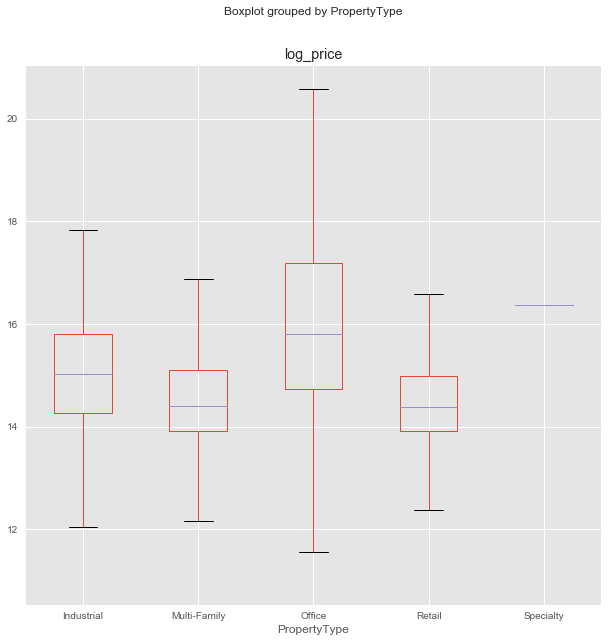

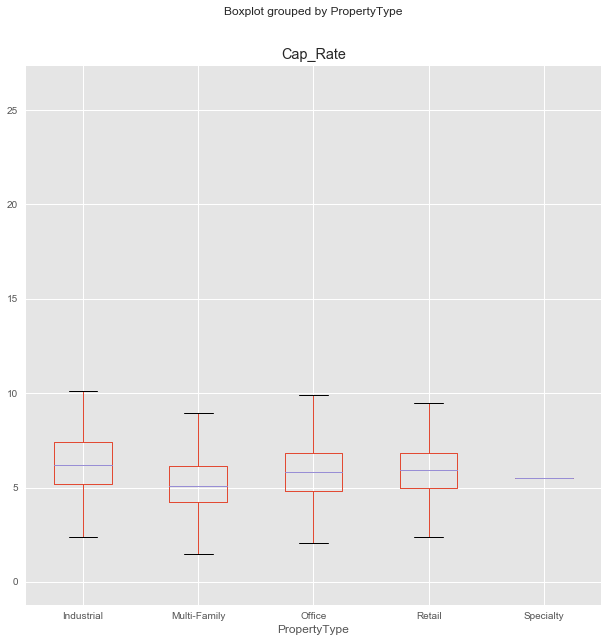

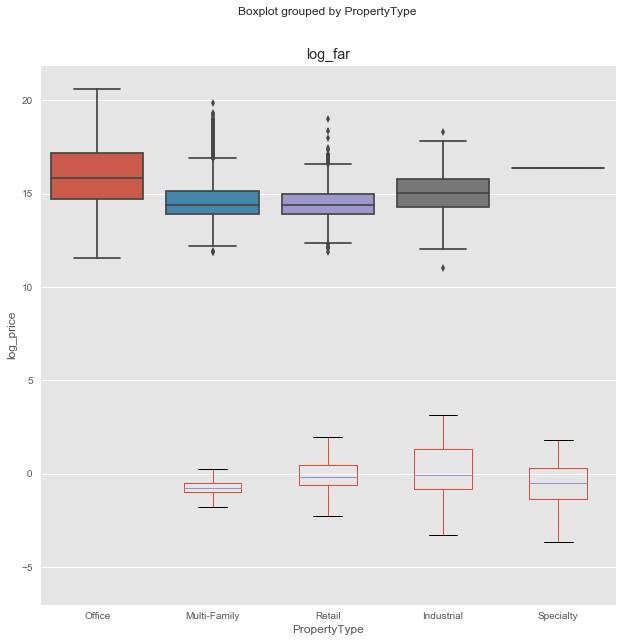

In [212]:
df.boxplot(column = 'log_price', by = 'PropertyType')
df.boxplot(column = 'Cap_Rate', by = 'PropertyType')
df.boxplot(column = 'log_far', by = 'PropertyType')

sb.boxplot(x='PropertyType',y='log_price',data=df)

#### Coloring

<Container object of 5957 artists>

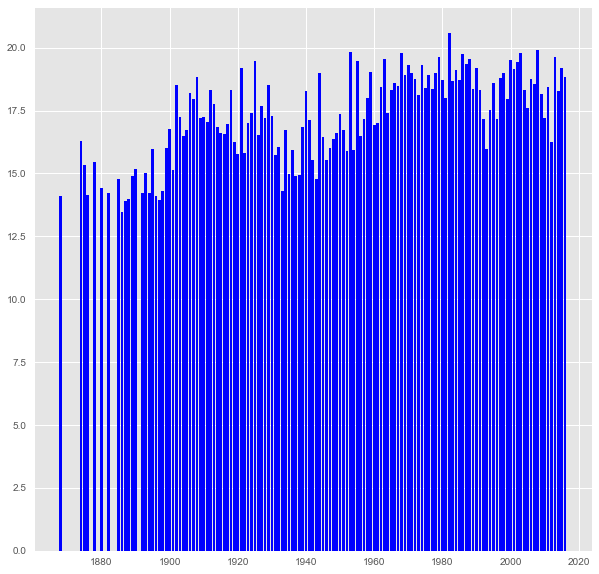

In [213]:
color =  ['blue']
plt.bar(df['Year Built'], df['log_price'], color = color)

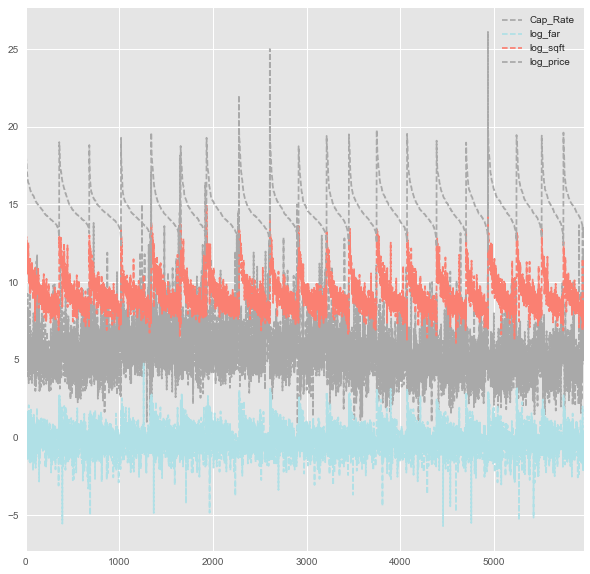

In [214]:
color_theme = ['darkgray','powderblue','salmon']
data.plot(color = color_theme, ls="--")

#### Labels

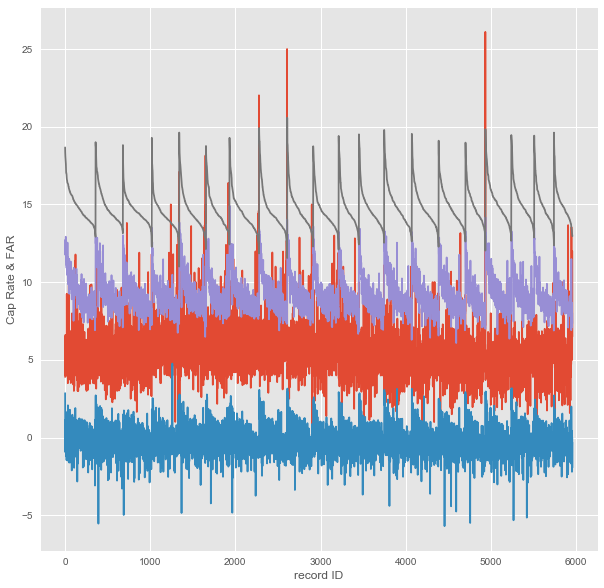

In [215]:
plt.plot(data, marker = '+')
ax.set_ylim([0,20])
plt.xlabel('record ID')
plt.ylabel('Cap Rate & FAR')

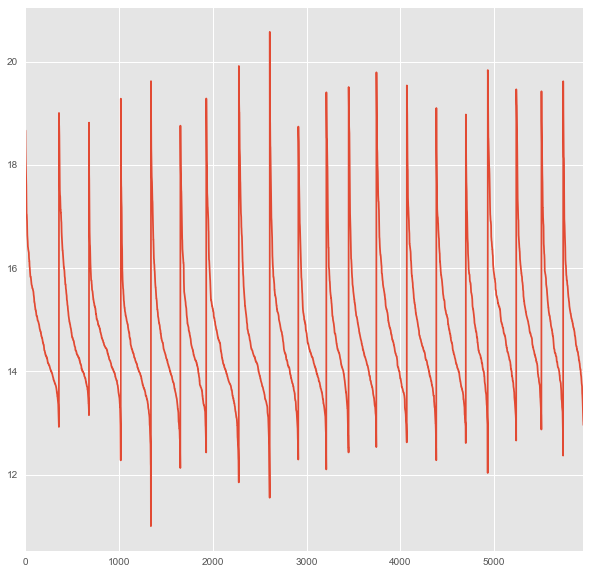

In [216]:
df['log_price'].plot()
ax.set_xticks(range(32))
ax.set_xticklabels(df.PropertyType, rotation=60, fontsize = 'small')
ax.set_title('Building SquareFootage by Property Type')

ax.set_xlabel('Building Type')
ax.set_ylabel('Square-footage')

## NumPy Math & Stats

In [217]:
lon = df['Longitude']
lat = df['Latitude']

#df.idxmax() <- Shows which row the max is in
df.mean()
df.max()
df.min()
df.std()
df.var()
df.describe()

Property Zip Code  Sale_Price  Cap_Rate   Bldg SF  Floor Area Ratio  \
count             5957.0      5957.0    5957.0    5957.0            5957.0   
mean             94475.5   8268869.4       5.6   27034.8               1.4   
std                360.3  29308073.6       1.8   81610.9               2.5   
min              94002.0     60000.0       0.1     439.0               0.0   
25%              94111.0   1160000.0       4.4    4466.0               0.5   
50%              94541.0   1980000.0       5.4    7392.0               0.8   
75%              94621.0   4268000.0       6.5   16014.0               1.7   
max              95148.0 864500000.0      26.1 3000000.0             117.2   

       Year Built  Number Of Units  Number Of Tenants  Longitude  Latitude  \
count      5819.0           4031.0             2276.0     5957.0    5957.0   
mean       1951.6             23.4                4.5     -122.2      37.7   
std          28.6             78.9                8.4        0.2       0.2   
min        1868.0              0.0                1.0     -122.7      37.2   
25%        1925.0              6.0                1.0     -122.4      37.5   
50%        1960.0              8.0                2.0     -122.3      37.8   
75%        1969.0             16.0                4.0     -122.1      37.8   
max        2016.0           3221.0               97.0     -121.7      38.2   

       units  sale_quarter  log_price  log_sqft  log_far  sale_year   ppsf  \
count 4031.0        5957.0     5957.0    5957.0   5957.0     5957.0 5957.0   
mean    23.4           2.6       14.8       9.2     -0.1     2012.3  314.8   
std     78.9           1.1        1.2       1.1      0.9        2.9  253.7   
min      0.0           1.0       11.0       6.1     -5.7     2007.0    2.4   
25%      6.0           2.0       14.0       8.4     -0.7     2010.0  179.4   
50%      8.0           3.0       14.5       8.9     -0.3     2013.0  263.4   
75%     16.0           4.0       15.3       9.7      0.5     2015.0  389.0   
max   3221.0           4.0       20.6      14.9      4.8     2017.0 9323.5   

          zip  
count  5957.0  
mean  94475.5  
std     360.3  
min   94002.0  
25%   94111.0  
50%   94541.0  
75%   94621.0  
max   95148.0

In [218]:
cities = df['Property City']
cities.value_counts() #shows unique values and how many

San Francisco          1546
Oakland                 823
San Jose                576
Berkeley                213
Redwood City            178
Hayward                 159
Santa Clara             143
San Mateo               131
San Rafael              122
Sunnyvale               110
Mountain View           100
Concord                  99
San Leandro              98
Alameda                  79
Richmond                 77
Vallejo                  74
Antioch                  72
Burlingame               71
Walnut Creek             67
Fremont                  66
Menlo Park               59
Palo Alto                57
Campbell                 52
South San Francisco      49
Novato                   44
Daly City                42
San Carlos               42
Belmont                  41
Livermore                40
Castro Valley            39
                       ... 
Larkspur                  8
Rodeo                     7
Oakley                    7
San Lorenzo               6
Foster City         

In [219]:
df.head(1)

Property Address  Property City  Property Zip Code  Sale Date  Sale_Price  \
0  180 Montgomery St  San Francisco              94104  1/18/2007   128000000   

  PropertyType  Cap_Rate  Bldg SF  Floor Area Ratio Building Class  \
0       Office       3.9   304162              17.5              A   

                         ...                         units  sale_date  \
0                        ...                           nan 2007-01-18   

   sale_quarter  log_price  log_sqft  log_far  sale_year  ppsf    zip  \
0             1       18.7      12.6      2.9       2007 420.8  94104   

                                          sale_yr_qt  
0  0       2007\n1       2007\n2       2007\n3   ...  

[1 rows x 27 columns]

In [274]:
num = LabelEncoder()
df['bin_city'] = num.fit_transform(df['Property City'].astype('str'))
df['bin_zip'] = num.fit_transform(df['Property Zip Code'].astype('str'))
df['bin_type'] = num.fit_transform(df['PropertyType'].astype('str'))
df['bin_class'] = num.fit_transform(df['Building Class'].astype('str'))
df['bin_condition'] = num.fit_transform(df['Building Condition'].astype('str'))
df['bin_material'] = num.fit_transform(df['BuildingMaterials'].astype('str'))
df['bin_yrbuilt'] = num.fit_transform(df['Year Built'].astype('str'))
df['bin_sale_year']= num.fit_transform(df['sale_year'].astype('str'))
qual = df[['bin_city','bin_type','bin_class','bin_condition','bin_material', 'bin_sale_year']]
qual.head()

bin_city  bin_type  bin_class  bin_condition  bin_material  bin_sale_year
0        74         2          0              3             3              0
1        39         1          1              3             5              0
2        10         1          1              3             4              0
3        53         2          0              3             0              0
4        35         2          1              3             2              0

In [221]:
grouper = qual.groupby(df['PropertyType'])
grouper.describe()

bin_city  bin_type  bin_class  bin_condition  \
PropertyType                                                       
Industrial   count     181.0     181.0      181.0          181.0   
             mean       55.8       0.0        1.7            2.8   
             std        25.0       0.0        0.5            0.6   
             min         0.0       0.0        0.0            1.0   
             25%        35.0       0.0        1.0            3.0   
             50%        56.0       0.0        2.0            3.0   
             75%        76.0       0.0        2.0            3.0   
             max        90.0       0.0        2.0            3.0   
Multi-Family count    4101.0    4101.0     4101.0         4101.0   
             mean       58.8       1.0        1.8            2.9   
             std        23.5       0.0        0.4            0.3   
             min         0.0       1.0        0.0            0.0   
             25%        53.0       1.0        2.0            3.0   
             50%        74.0       1.0        2.0            3.0   
             75%        74.0       1.0        2.0            3.0   
             max        91.0       1.0        4.0            4.0   
Office       count     672.0     672.0      672.0          672.0   
             mean       60.5       2.0        1.2            2.8   
             std        22.2       0.0        0.7            0.7   
             min         0.0       2.0        0.0            0.0   
             25%        50.0       2.0        1.0            3.0   
             50%        74.0       2.0        1.0            3.0   
             75%        74.0       2.0        2.0            3.0   
             max        91.0       2.0        2.0            4.0   
Retail       count    1002.0    1002.0     1002.0         1002.0   
             mean       56.8       3.0        4.0            2.9   
             std        25.1       0.0        0.1            0.4   
             min         0.0       3.0        2.0            0.0   
             25%        36.5       3.0        4.0            3.0   
             50%        72.0       3.0        4.0            3.0   
             75%        75.0       3.0        4.0            3.0   
             max        91.0       3.0        4.0            4.0   
Specialty    count       1.0       1.0        1.0            1.0   
             mean       74.0       4.0        4.0            3.0   
             std         nan       nan        nan            nan   
             min        74.0       4.0        4.0            3.0   
             25%        74.0       4.0        4.0            3.0   
             50%        74.0       4.0        4.0            3.0   
             75%        74.0       4.0        4.0            3.0   
             max        74.0       4.0        4.0            3.0   

                    bin_material  sale_year  
PropertyType                                 
Industrial   count         181.0      181.0  
             mean            1.4     2012.1  
             std             1.6        3.2  
             min             0.0     2007.0  
             25%             0.0     2009.0  
             50%             1.0     2012.0  
             75%             2.0     2015.0  
             max             5.0     2017.0  
Multi-Family count        4101.0     4101.0  
             mean            3.7     2012.3  
             std             1.8        2.8  
             min             0.0     2007.0  
             25%             4.0     2010.0  
             50%             4.0     2013.0  
             75%             5.0     2015.0  
             max             5.0     2017.0  
Office       count         672.0      672.0  
             mean            2.5     2012.5  
             std             1.9        3.0  
             min             0.0     2007.0  
             25%             0.0     2010.8  
             50%             3.0     2013.0  
             75%             4.0     2015.0  
             

In [222]:
df['yr_built_cat'] = pd.Series(df['Year Built'],dtype = 'category')
df['yr_built_cat'].value_counts()

1963.0    263
1964.0    251
1962.0    225
1960.0    217
1961.0    184
1965.0    172
1900.0    157
1959.0    139
1958.0    132
1907.0    119
1908.0     93
1957.0     92
1970.0     92
1925.0     91
1910.0     90
1950.0     81
1972.0     80
1966.0     77
1924.0     72
1969.0     72
1923.0     70
1986.0     70
1926.0     69
1955.0     69
1927.0     67
1968.0     67
1956.0     64
1912.0     62
1967.0     60
1971.0     59
         ... 
1996.0      8
1994.0      8
2011.0      8
2010.0      7
2012.0      7
1903.0      7
1933.0      7
1901.0      7
2016.0      6
1931.0      6
1899.0      5
1995.0      5
1934.0      4
1878.0      4
1889.0      3
1885.0      3
1896.0      2
1894.0      2
1893.0      2
1892.0      2
1897.0      2
1887.0      2
1874.0      2
1875.0      2
1880.0      2
1876.0      1
1888.0      1
1882.0      1
1886.0      1
1868.0      1
Name: yr_built_cat, dtype: int64

#### Crosstabbing
Crosstabs are a good way to view categorical variables against each other
This may be a good thing to use for early data examination or understanding a variable more in-depth

In [223]:
pd.crosstab(df.bin_type,df.bin_class)

bin_class    0    1     2  3     4
bin_type                          
0            3   57   121  0     0
1           40  600  3457  1     3
2          100  340   232  0     0
3            0    0     1  0  1001
4            0    0     0  0     1

# Correlation Analysis

#### Linear Correlation (Pearson)

Assumptions
- normally distributed
- numeric variables
- linearly related

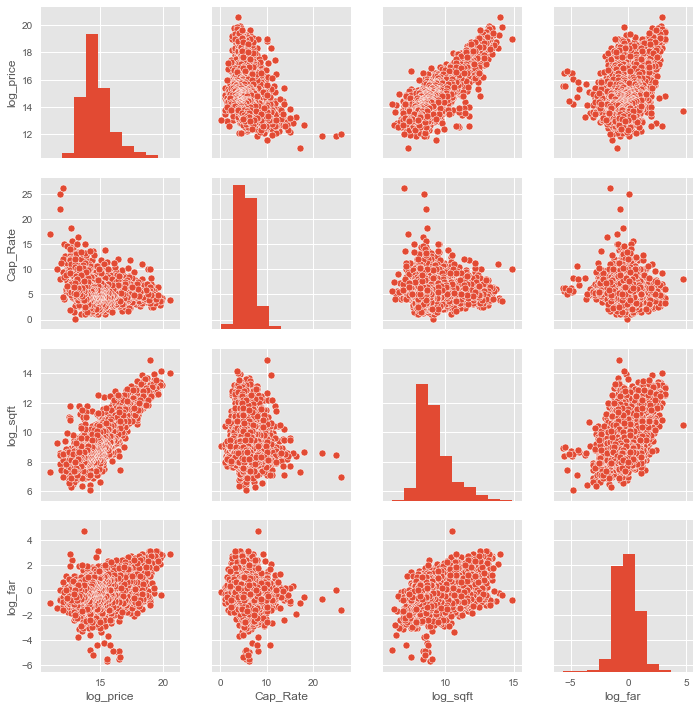

In [224]:
quant = df[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(quant)

In [225]:
price = df['Sale_Price']
cap = df['Cap_Rate']
sqft = df['Bldg SF']
far = df['Floor Area Ratio']

pearsonr_coefficient, p_value = pearsonr(price, cap)
print ('Pearson R Corr. Coef.')
(pearsonr_coefficient)

Pearson R Corr. Coef.


-0.080963545039635793

In [226]:
pearsonr_coefficient, p_value = pearsonr(price, sqft)
print ('Pearson R Corr. Coef.')
(pearsonr_coefficient)

Pearson R Corr. Coef.


0.77203874719578058

In [227]:
pearsonr_coefficient, p_value = pearsonr(price, far)
print ('Pearson R Corr. Coef.')
(pearsonr_coefficient)

Pearson R Corr. Coef.


0.44569370579400824

In [228]:
corr = quant.corr()
corr

log_price  Cap_Rate  log_sqft  log_far
log_price        1.0      -0.2       0.9      0.3
Cap_Rate        -0.2       1.0      -0.0     -0.2
log_sqft         0.9      -0.0       1.0      0.3
log_far          0.3      -0.2       0.3      1.0

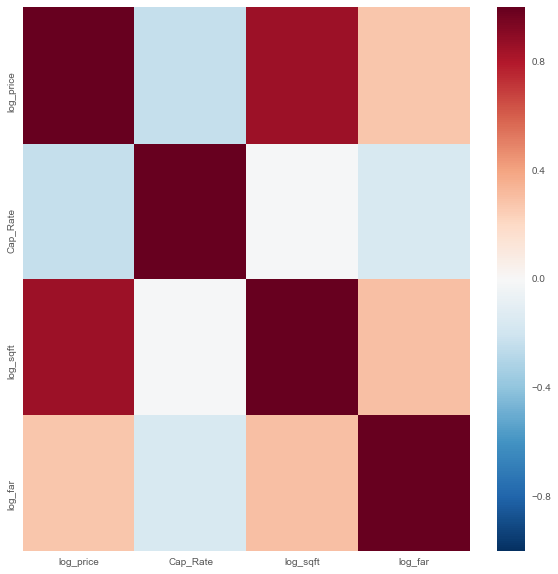

In [229]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#### Non-linear Correlation (Spearman)

Assumptions
- nonlinearly related
- non-normally distributed
- Ordinal variables
    - binning variables from categorical variables into numerics are a good why to transform the variables. Might be good for large categorical variables like: yr built, zip, lat, long, units, tenants

In [230]:
# Binning
num = LabelEncoder()
df['bin_city'] = num.fit_transform(df['Property City'].astype('str'))
df['bin_zip'] = num.fit_transform(df['Property Zip Code'].astype('str'))
df['bin_type'] = num.fit_transform(df['PropertyType'].astype('str'))
df['bin_class'] = num.fit_transform(df['Building Class'].astype('str'))
df['bin_condition'] = num.fit_transform(df['Building Condition'].astype('str'))
df['bin_material'] = num.fit_transform(df['BuildingMaterials'].astype('str'))
df['bin_yrbuilt'] = num.fit_transform(df['Year Built'].astype('str'))
df['bin_sale_year']= num.fit_transform(df['sale_year'].astype('str'))

# how to bin long and lat???
# df['bin_long'] = num.fit_transform(df['Longitude'].astype('str'))
df.head()

Property Address  Property City  Property Zip Code  Sale Date  \
0        180 Montgomery St  San Francisco              94104  1/18/2007   
1  700 Lincoln Village Cir       Larkspur              94939  7/25/2007   
2        2020 Kittredge St       Berkeley              94704   6/8/2007   
3            155 Grand Ave        Oakland              94612  5/11/2007   
4      22301 Foothill Blvd        Hayward              94541  9/20/2007   

   Sale_Price  PropertyType  Cap_Rate  Bldg SF  Floor Area Ratio  \
0   128000000        Office       3.9   304162              17.5   
1    94500000  Multi-Family       4.3   293198               0.4   
2    75000000  Multi-Family       4.2   127830               2.0   
3    72000000        Office       5.6   204336               3.1   
4    66500000        Office       6.6   336000               1.0   

  Building Class      ...       \
0              A      ...        
1              B      ...        
2              B      ...        
3              A      ...        
4              B      ...        

                                          sale_yr_qt bin_city  bin_zip  \
0  0       2007\n1       2007\n2       2007\n3   ...       74       30   
1  0       2007\n1       2007\n2       2007\n3   ...       39      155   
2  0       2007\n1       2007\n2       2007\n3   ...       10      136   
3  0       2007\n1       2007\n2       2007\n3   ...       53      130   
4  0       2007\n1       2007\n2       2007\n3   ...       35       82   

   bin_type  bin_class  bin_condition  bin_material  bin_yrbuilt  \
0         2          0              3             3          100   
1         1          1              3             5           99   
2         1          1              3             4          127   
3         2          0              3             0          111   
4         2          1              3             2           79   

  bin_sale_year  yr_built_cat  
0             0        1979.0  
1             0        1978.0  
2             0        2006.0  
3             0        1990.0  
4             0        1958.0  

[5 rows x 36 columns]

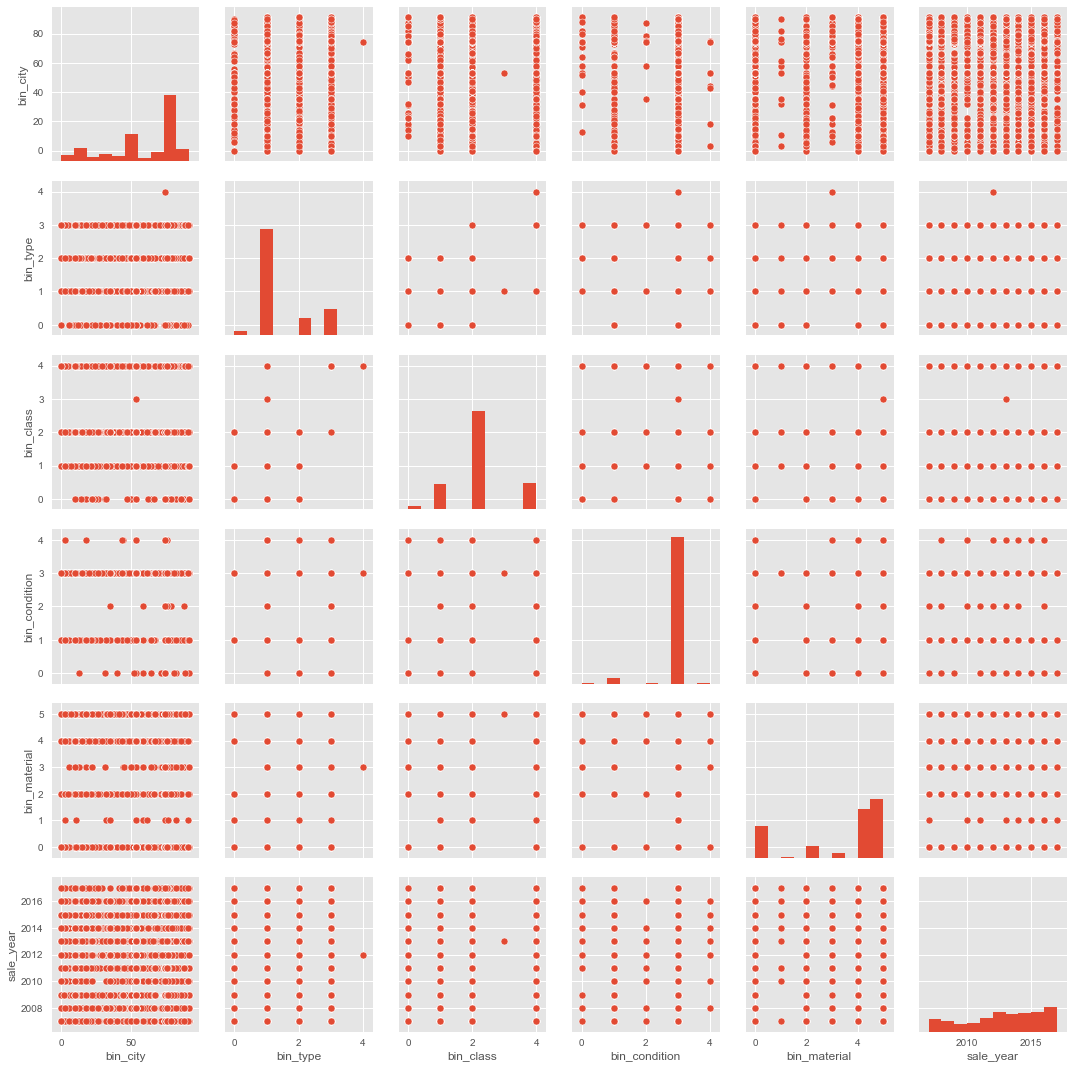

In [231]:
sb.pairplot(qual)

In [232]:
b_type = df['bin_type']
b_city = df['bin_city']
b_class = df['bin_class']
b_cond = df['bin_condition']
b_material = df['bin_material']

spearmanr(b_type,b_city)

SpearmanrResult(correlation=-0.0063664975389083065, pvalue=0.62322958928533578)

In [233]:
spearmanr(b_type,b_class)

SpearmanrResult(correlation=0.46660275168337129, pvalue=0.0)

In [234]:
spearmanr(b_type,b_cond)

SpearmanrResult(correlation=-0.04059698186474104, pvalue=0.0017245581197494477)

In [235]:
spearmanr(b_type,b_material)

SpearmanrResult(correlation=-0.135878254464458, pvalue=6.0227624007203475e-26)

#### p-values > .05  mean the variables are not correlated

In [236]:
table = pd.crosstab(b_type,b_class)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

(7082.3024043245387, 0.0)

In [237]:
table = pd.crosstab(b_type,b_city)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

(1250.4520728720349, 1.3736522367313301e-97)

In [238]:
table = pd.crosstab(b_type,b_cond)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

(168.16298302591912, 1.9570292177112244e-27)

In [239]:
table = pd.crosstab(b_type,b_material)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

(1794.209834321877, 0.0)

# Transform & Scale
To prevent differing magnitude amoung variables from producing errorneous or misleading statistics

### Normalization
putting each observation on a relative scale beween the values of 0 and 1 
- Scikit-Learn Preprocessing
    - Scale data
    - Center data
    - Normalize data
    - Bin data
    - Impute data

In [240]:
df.head()

Property Address  Property City  Property Zip Code  Sale Date  \
0        180 Montgomery St  San Francisco              94104  1/18/2007   
1  700 Lincoln Village Cir       Larkspur              94939  7/25/2007   
2        2020 Kittredge St       Berkeley              94704   6/8/2007   
3            155 Grand Ave        Oakland              94612  5/11/2007   
4      22301 Foothill Blvd        Hayward              94541  9/20/2007   

   Sale_Price  PropertyType  Cap_Rate  Bldg SF  Floor Area Ratio  \
0   128000000        Office       3.9   304162              17.5   
1    94500000  Multi-Family       4.3   293198               0.4   
2    75000000  Multi-Family       4.2   127830               2.0   
3    72000000        Office       5.6   204336               3.1   
4    66500000        Office       6.6   336000               1.0   

  Building Class      ...       \
0              A      ...        
1              B      ...        
2              B      ...        
3              A      ...        
4              B      ...        

                                          sale_yr_qt bin_city  bin_zip  \
0  0       2007\n1       2007\n2       2007\n3   ...       74       30   
1  0       2007\n1       2007\n2       2007\n3   ...       39      155   
2  0       2007\n1       2007\n2       2007\n3   ...       10      136   
3  0       2007\n1       2007\n2       2007\n3   ...       53      130   
4  0       2007\n1       2007\n2       2007\n3   ...       35       82   

   bin_type  bin_class  bin_condition  bin_material  bin_yrbuilt  \
0         2          0              3             3          100   
1         1          1              3             5           99   
2         1          1              3             4          127   
3         2          0              3             0          111   
4         2          1              3             2           79   

  bin_sale_year  yr_built_cat  
0             0        1979.0  
1             0        1978.0  
2             0        2006.0  
3             0        1990.0  
4             0        1958.0  

[5 rows x 36 columns]

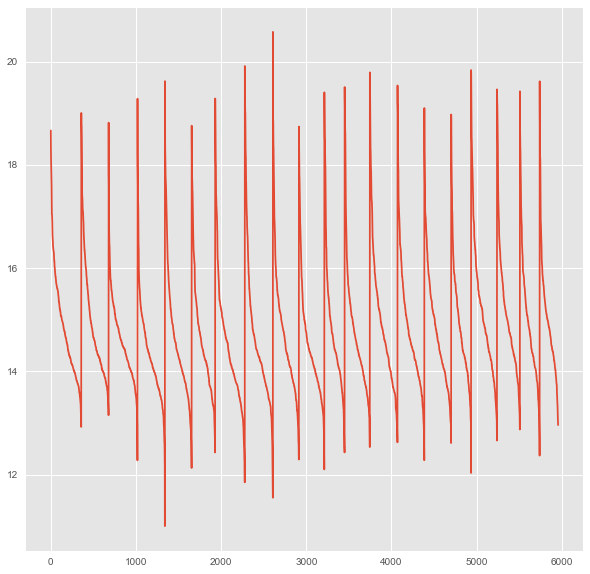

In [241]:
price = df.log_price
plt.plot(price)

In [242]:
df[['log_price']].describe()

log_price
count     5957.0
mean        14.8
std          1.2
min         11.0
25%         14.0
50%         14.5
75%         15.3
max         20.6

C:\Users\sstandring\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


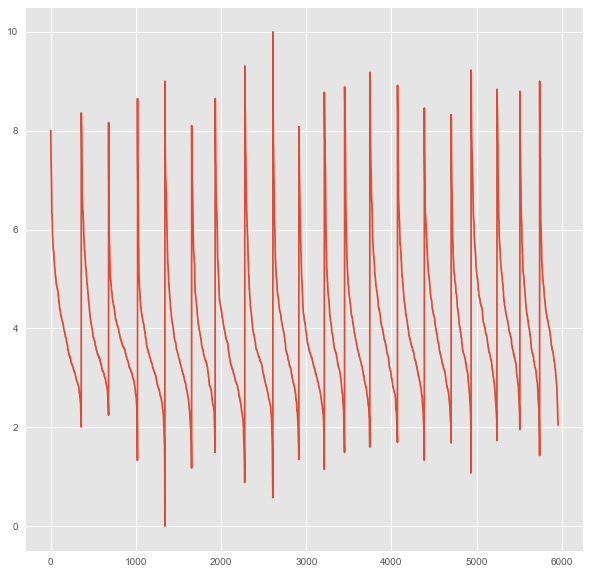

In [243]:
price_matrix = price.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range = (0,10))
scaled_price = scaled.fit_transform(price_matrix)
plt.plot(scaled_price)

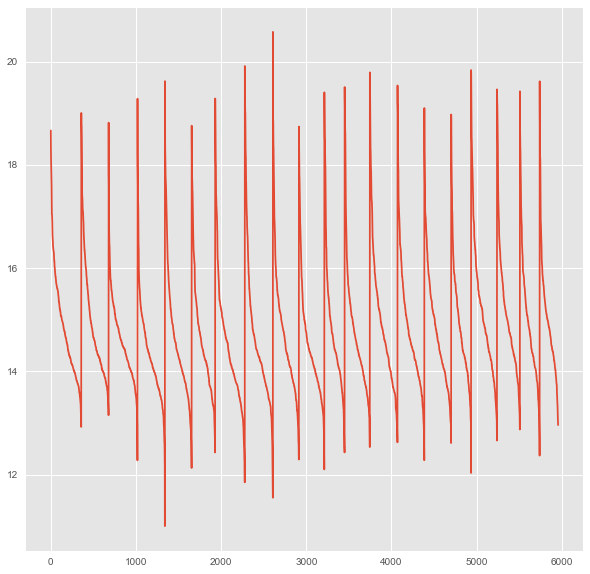

In [244]:
standardized_price = scale(price, axis = 0, with_mean=False, with_std=False)
plt.plot(standardized_price)

### Standardization 
Rescaling data so it has a zero mean and unit variance 

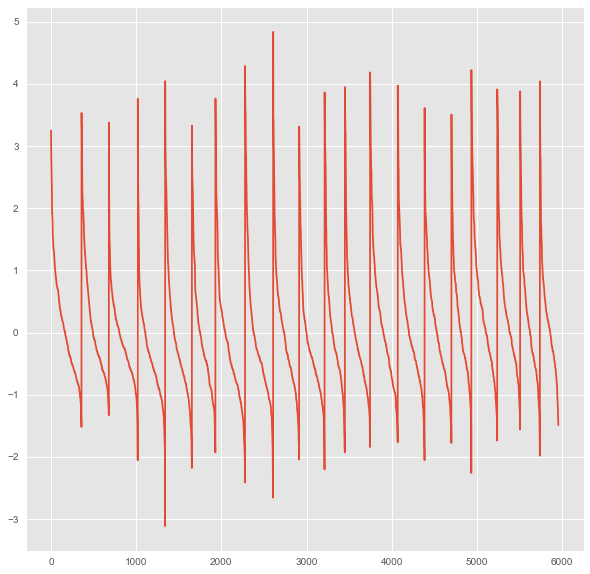

In [245]:
standardized_price = scale(price)
plt.plot(standardized_price)

# Machine Learning
- Techniques
    - Regression
        - Linear
        - Logistic
    - Decision Tree
    - Neural Network
    - Bayeian 
        - Naive Bayes
    - Deep Learning
    - Ensemble
    - Regularization
    - Rule System
    - Dimension Reduction
        - PCA
    - Instance Based
        - k-nearest neighbor
    - Clustering
        - k-means Clustering
        - Hierarchical Clustering
        - Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
        
- Test and Train Sets
    - Use random sampling to generate random samples and then break the data into test and training sets:
        - train set: 2/3 of data set 
        - test set: 1/3  of data set
       
- Supervised vs Unsupervised Learning
    - Supervised
        - Labeled data
        - Learning from the now
    - Unsupervised
        - Unlabeled data
        -Learning from history and unknown

##### Factor Analysis
- Latent Variables
    - Variables are meaningful but inferred and not directly observable
- Assumptions
    - Metric
    - Continuous or ordinal
    - r > 0.3
    - n > 100 & more than 5 observations per feautre (col.)
    - Homogenous    

###### Singluar Variable Decomposition (SVD)
- Decompose a matrix into 3 resultant metrices to reduce info redunancy and noise
- Commonly used in PCA

### PCA

In [246]:
pca = decomposition.PCA()
df_pca = pca.fit_transform(quant)

pca.explained_variance_ratio_

array([ 0.50789097,  0.35810905,  0.11068725,  0.02331273])

In [247]:
pca.explained_variance_ratio_.sum()

1.0

How much info is compresed into the first few components

When you are deciding how many components to keep, look at the percent of cumulative variance. Make sure to retain at least 70% of the dataset's original information.
1 = 100%


In [248]:
names = quant.columns.values
comps = pd.DataFrame(pca.components_,names)
comps

0    1    2    3
log_price -0.4  0.9 -0.3 -0.2
Cap_Rate   0.6  0.5  0.6  0.2
log_sqft   0.2 -0.1  0.1 -1.0
log_far   -0.7 -0.1  0.7 -0.1

Using the matrix above and heatmap below we look to see which components are worth keeping
* Remember components are the numbers! not the variables!

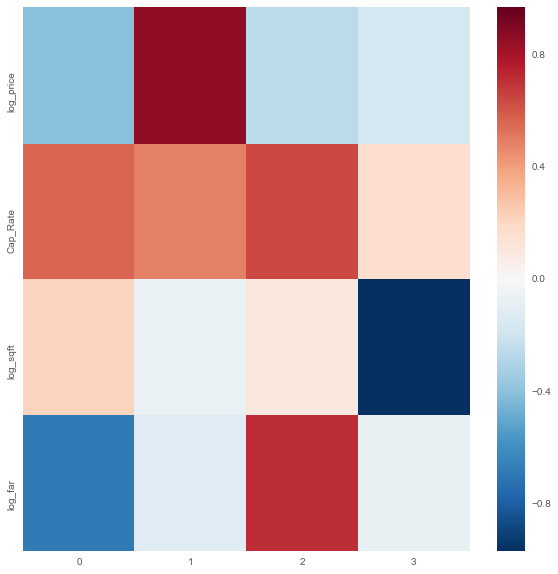

In [249]:
sb.heatmap(comps)

In [250]:
pca = decomposition.PCA()
df_pca = pca.fit_transform(qual)

pca.explained_variance_ratio_

array([  9.76328333e-01,   1.45149734e-02,   6.16003321e-03,
         2.31740383e-03,   3.97596760e-04,   2.81659574e-04])

In [251]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [252]:
name = qual.columns.values
comps = pd.DataFrame(pca.components_,name)
comps

0    1    2    3    4    5
bin_city      -1.0  0.0  0.0  0.0 -0.0  0.0
bin_type      -0.0 -0.0 -0.0 -0.0  0.1 -1.0
bin_class      0.0  0.1  0.0 -0.0 -1.0 -0.1
bin_condition  0.0  0.6  0.8  0.0  0.0 -0.0
bin_material  -0.0  0.7 -0.6 -0.4  0.0 -0.0
sale_year      0.0 -0.3  0.3 -0.9 -0.0  0.0

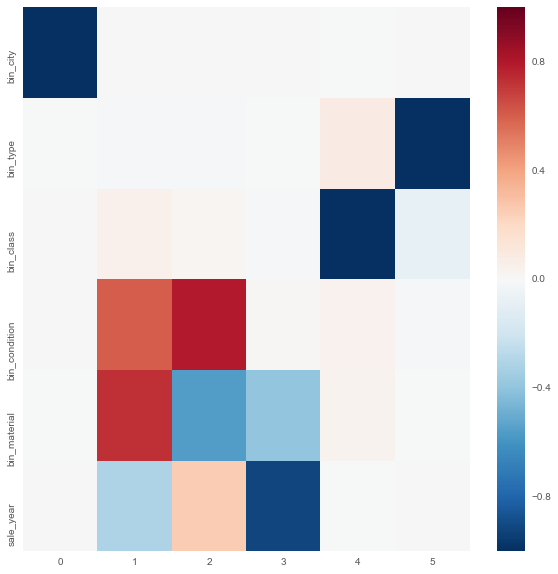

In [253]:
sb.heatmap(comps)

In [254]:
qualandquant = df[['log_price','Cap_Rate','log_sqft','log_far','bin_city','bin_type','bin_sale_year']]
pca = decomposition.PCA()
df_pca = pca.fit_transform(qualandquant)

pca.explained_variance_ratio_

array([  9.72854656e-01,   1.47002829e-02,   5.67179466e-03,
         4.17936878e-03,   1.30172050e-03,   1.06415337e-03,
         2.28023803e-04])

In [255]:
namers = qualandquant.columns.values
comps = pd.DataFrame(pca.components_,namers)
comps

0    1    2    3    4    5    6
log_price     -0.0  0.0 -0.0 -0.0 -1.0  0.0  0.0
Cap_Rate      -0.1  0.2  0.0  0.0 -0.0 -0.0 -1.0
log_sqft      -0.4  0.8 -0.3 -0.2  0.0  0.1  0.2
log_far        0.6  0.5  0.6  0.1  0.0  0.0  0.1
bin_city       0.2 -0.1  0.0 -0.8  0.0  0.5 -0.0
bin_type       0.0 -0.0 -0.2  0.5 -0.0  0.9 -0.0
bin_sale_year -0.7 -0.1  0.7 -0.1  0.0  0.2  0.0

# Outliers
- Point outliers
    - Distance observations when compared to majority
- Contextual outliers
    - Distance observations when compared to specific context
- Collective outliers
    - A clustering of outliers that may seem reasonable in comparsion to each other

Tukey Method
1. boxplot outliers
2. Using the interquartile ranges to see outliers

[]

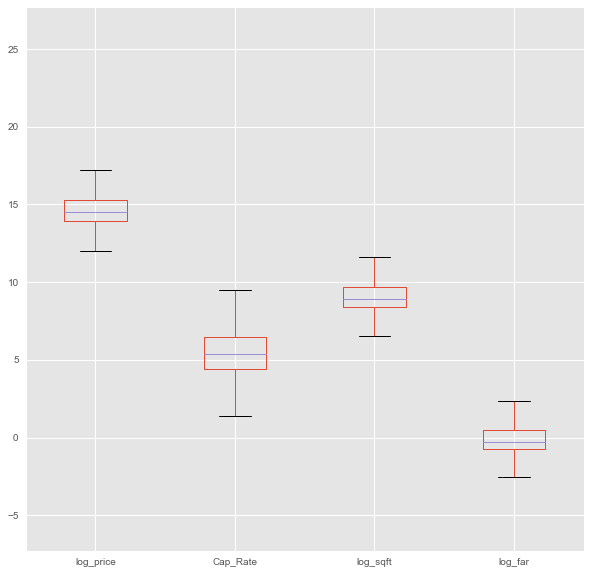

In [256]:
# 1. Boxplot use
x = qualandquant.ix[:,0:5].values
y = qualandquant.ix[:,5].values
quant.boxplot(return_type='dict')
plt.plot()

In [257]:
pricing = x[:,1]
prop_outliers = (pricing > 17)
qualandquant[prop_outliers]
# remove the rows if the values are outliers!

log_price  Cap_Rate  log_sqft  log_far  bin_city  bin_type  \
1339       11.0      17.1       7.3     -1.0        67         0   
1648       12.7      18.1       8.7     -0.5        90         1   
2276       11.8      22.0       8.6     -0.7        53         1   
2606       11.8      25.0       8.5      0.0        53         3   
4934       12.0      26.1       7.0     -1.6        53         0   

      bin_sale_year  
1339              2  
1648              3  
2276              5  
2606              5  
4934              8

In [258]:
# 2. IQR use 
pd.options.display.float_format = '{:.1f}'.format
x_qaq = pd.DataFrame(x)
print (x_qaq.describe())

           0      1      2      3      4
count 5957.0 5957.0 5957.0 5957.0 5957.0
mean    14.8    5.6    9.2   -0.1   58.6
std      1.2    1.8    1.1    0.9   23.7
min     11.0    0.1    6.1   -5.7    0.0
25%     14.0    4.4    8.4   -0.7   50.0
50%     14.5    5.4    8.9   -0.3   74.0
75%     15.3    6.5    9.7    0.5   74.0
max     20.6   26.1   14.9    4.8   91.0


In [259]:
# IQR = 75% - 25%
# dif = IQR * 1.5
# outlier limit = 25% - dif OR 75% + dif

#### Multivariate outliers

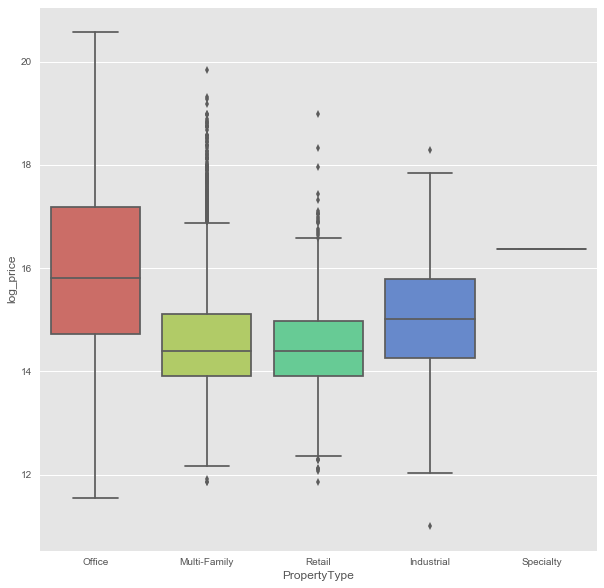

In [260]:
sb.boxplot(x=df.PropertyType, y=df.log_price, data=df, palette='hls')

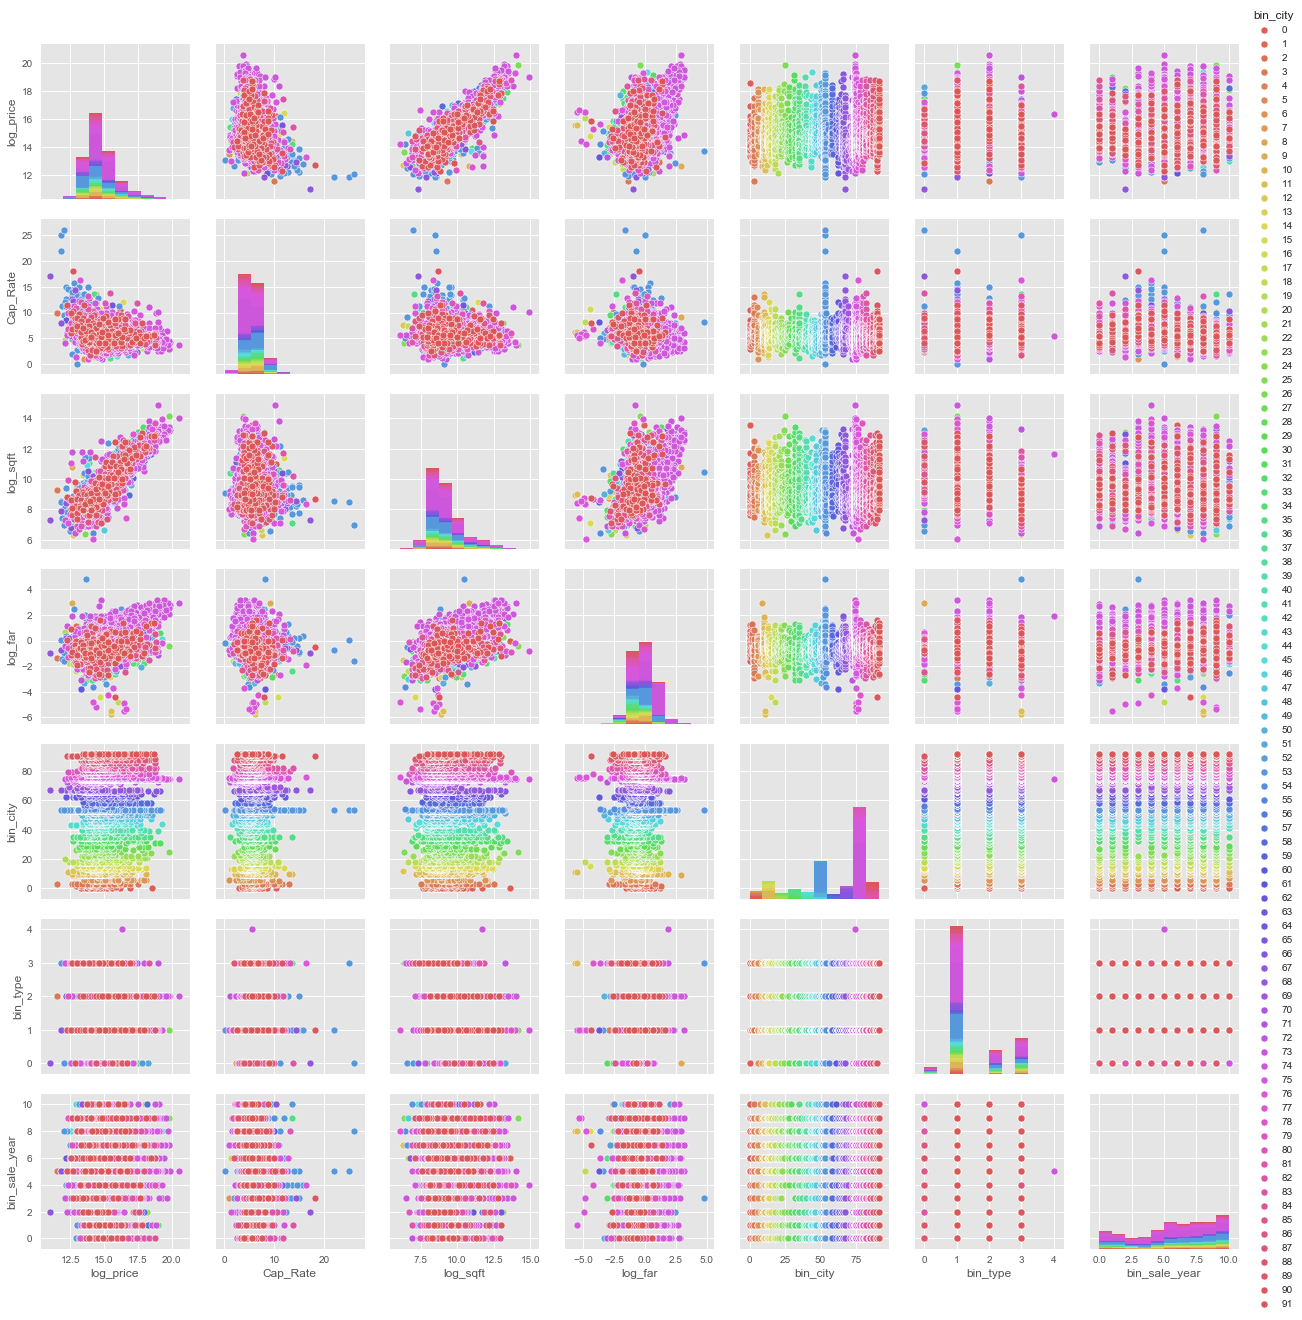

In [261]:
sb.pairplot(qualandquant,hue='bin_city', palette='hls')

### DBSCAN
- Unsupervised method that clusters core samples and denotes non-core samples 
- use to identify collective outliers
- eps = the max distance between two samples for them to be clustered in the same neighborhood (start at 0.1)
- min_samples = the min number of samples in a neighborhood for a data point to qualify as a core point (start very low)

In [262]:
model = DBSCAN(eps = 0.8, min_samples=19).fit(qualandquant)
model

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)

In [263]:
outliers_df = pd.DataFrame(qualandquant)

print(Counter(model.labels_))

print (outliers_df[model.labels_ ==-1])

Counter({-1: 5285, 1: 128, 2: 124, 5: 111, 8: 101, 4: 77, 6: 43, 3: 39, 0: 25, 7: 24})
      log_price  Cap_Rate  log_sqft  log_far  bin_city  bin_type  \
0          18.7       3.9      12.6      2.9        74         2   
1          18.4       4.3      12.6     -0.9        39         1   
2          18.1       4.2      11.8      0.7        10         1   
3          18.1       5.6      12.2      1.1        53         2   
4          18.0       6.6      12.7     -0.0        35         2   
5          18.0       4.0      12.4     -0.5        81         1   
6          17.9       6.5      12.7     -0.0        35         2   
7          17.7       6.0      11.9     -0.4        78         2   
8          17.7       5.5      12.9     -0.9        67         1   
9          17.6       4.8      12.3      0.9        17         1   
10         17.3       5.2      11.5     -0.5        82         2   
11         17.2       4.5      11.8     -0.5        76         1   
12         17.0       5.0    

## K-Mean Cluster Analysis
- Unsupervised data
        - number of cluster centers (K)
        - Nearest mean Values (Euclidian distance between observations)
- used when there is an idea of the subgroups
- Used for market price and cost modeling
- customer segmentation
- insurance claim, fraud detection
- Necesary things to keep in mind
    - Scale variables before
    - look at data to estimate number of clusterings

In [264]:
x = scale(qualandquant)
y = pd.DataFrame(qualandquant.bin_type)
names = qualandquant.columns.values
names

array(['log_price', 'Cap_Rate', 'log_sqft', 'log_far', 'bin_city',
       'bin_type', 'bin_sale_year'], dtype=object)

In [265]:
clustering = KMeans(n_clusters=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Plotting

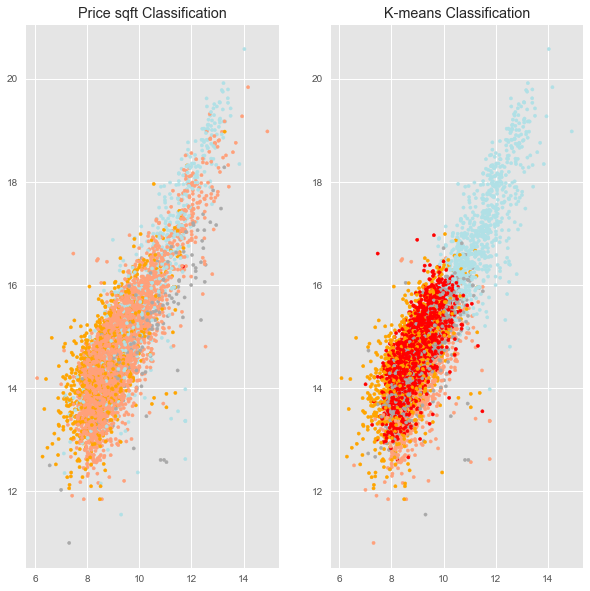

In [266]:
y.columns = ['bin_type']

color_theme = np.array(['darkgray','lightsalmon','powderblue','orange','red'])
plt.subplot(1,2,1)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[qualandquant.bin_type], s=10)
plt.title('Price sqft Classification')

plt.subplot(1,2,2)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[clustering.labels_], s=10)
plt.title('K-means Classification')

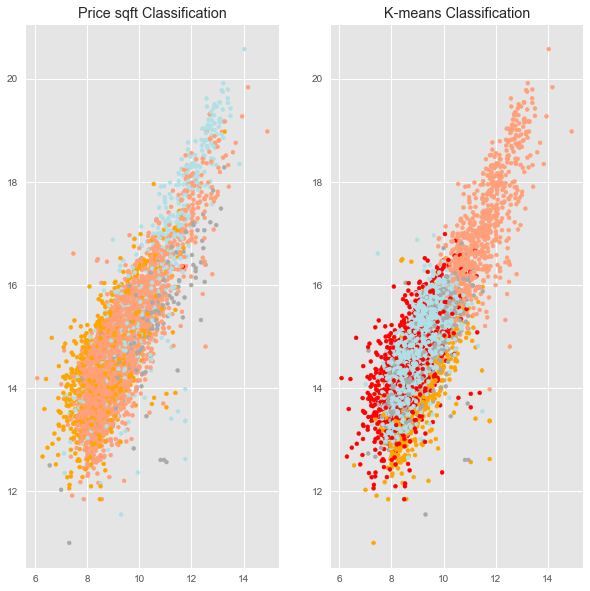

In [267]:
relabel = np.choose(clustering.labels_, [0,3,1,4,2]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[qualandquant.bin_type], s=15)
plt.title('Price sqft Classification')

plt.subplot(1,2,2)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[relabel], s=15)
plt.title('K-means Classification')


Doesn't look like an amazingly great job because of the top right section is all the same cluster

In [268]:
print(classification_report(y,relabel))
# Precision: model's relevancy
# Recall: model's completeness

             precision    recall  f1-score   support

          0       0.06      0.28      0.10       181
          1       0.49      0.09      0.15      4101
          2       0.05      0.11      0.07       672
          3       0.00      0.00      0.00      1002
          4       0.00      0.00      0.00         1

avg / total       0.35      0.08      0.11      5957



### Hierarchical Clustering
- Finds distance between each data point and its nearest neighbors
- Linking the most nearby neighbors
- Dendrogram
- Parameters
    - Distance Metrics:
        - Euclidian
        - Manhattan
        - Consine
    - Linkage Parameters
        - Ward
        - Complete
        - Average
    - Use trail and error

### K-Nearest Neighbors 
- Supervised
- predicts based on how similar training observations are to the new, incoming, observations
- Assumptions
    - Ordinal or nominal y variables
    - numeric or ordinal x variables (because of scaling)
    - little noise
    - labeled
    - only relevant features
    - distinguishable subgroups
    - avoid using large datasets as it will take a long time.

#### Splitting data into test and train sets

In [269]:
df.columns

Index(['Property Address', 'Property City', 'Property Zip Code', 'Sale Date',
       'Sale_Price', 'PropertyType', 'Cap_Rate', 'Bldg SF', 'Floor Area Ratio',
       'Building Class', 'Building Condition', 'BuildingMaterials',
       'Year Built', 'Number Of Units', 'Number Of Tenants', 'Longitude',
       'Latitude', 'units', 'sale_date', 'sale_quarter', 'log_price',
       'log_sqft', 'log_far', 'sale_year', 'ppsf', 'zip', 'sale_yr_qt',
       'bin_city', 'bin_zip', 'bin_type', 'bin_class', 'bin_condition',
       'bin_material', 'bin_yrbuilt', 'bin_sale_year', 'yr_built_cat'],
      dtype='object')

In [270]:
x_prime = df.ix[:,(20,21,22,23,26)].values
y = df.ix[:,29].values

In [271]:
x = preprocessing.scale(x_prime)

ValueError: could not convert string to float: '0       2007\n1       2007\n2       2007\n3       2007\n4       2007\n5       2007\n6       2007\n7       2007\n8       2007\n9       2007\n10      2007\n11      2007\n12      2007\n13      2007\n14      2007\n15      2007\n16      2007\n17      2007\n18      2007\n19      2007\n20      2007\n21      2007\n22      2007\n23      2007\n24      2007\n25      2007\n26      2007\n27      2007\n28      2007\n29      2007\n        ... \n5927    2017\n5928    2017\n5929    2017\n5930    2016\n5931    2017\n5932    2017\n5933    2017\n5934    2016\n5935    2016\n5936    2016\n5937    2017\n5938    2016\n5939    2017\n5940    2016\n5941    2017\n5942    2017\n5943    2017\n5944    2017\n5945    2017\n5946    2017\n5947    2017\n5948    2017\n5949    2017\n5950    2017\n5951    2016\n5952    2017\n5953    2016\n5954    2016\n5955    2016\n5956    2017\nName: sale_year, dtype: int640       1\n1       3\n2       2\n3       2\n4       3\n5       2\n6       1\n7       2\n8       3\n9       3\n10      3\n11      3\n12      3\n13      2\n14      2\n15      2\n16      3\n17      1\n18      3\n19      3\n20      3\n21      3\n22      2\n23      2\n24      2\n25      3\n26      3\n27      2\n28      3\n29      3\n       ..\n5927    1\n5928    1\n5929    1\n5930    4\n5931    1\n5932    1\n5933    1\n5934    4\n5935    4\n5936    4\n5937    1\n5938    4\n5939    1\n5940    4\n5941    1\n5942    1\n5943    1\n5944    1\n5945    1\n5946    1\n5947    1\n5948    1\n5949    1\n5950    1\n5951    4\n5952    1\n5953    4\n5954    4\n5955    4\n5956    1\nName: sale_quarter, dtype: int32'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33, random_state=17)

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
print(clf)

In [ ]:
y_expect = y_test
y_pred = clf.predict(x_test)

print(metrics.classification_report(y_expect, y_pred))

This is showing us that types 1 and 3 are very complete and the relevance is very high for both
0, 2, 4 are not full for completeness, but the relevance of 2 is high
* This is probably because the majority of the dataset is either 1,2,3 types
* May want to get more info for 0 and 4

# Network Analysis

#### Vocab
- Network
    - Body of connected data that's evaluated during graph analysis
- Graph
    - Data visualization schematic depicting data comprised in a network
- Nodes
    - Vertices around which a graph is formed
- Edges
    - Lines that connect veritces within a graph structure
- Directed graph (digraph) 
    - Graph where there is a direction assigned to each edge that connects a node
- Directed edge
    - Edge feature that has been asssigned a direction between nodes
-Undirected graph
    - Graph where all edges are bidirectional
- Undirected Edge 
    - Bidirectional edge feature
- Graph size
    - Number of edges in a graph
- Graph order
    - Number of vertices in a graph
- Degree
    - Number of edges connected to a vertex, with loops counted twice


#### Types of Graph Generators
- graph drawing algorithms
- Network analysis algorithms
- Algorithmic routing for graphs
- Graph search algorithms
- Subgraph algorithms


In [ ]:
G = nx.Graph()
G.add_node(1)
nx.draw(G)

In [ ]:
G.add_nodes_from([2,3,4,5,6,8,9,12,15,16])
nx.draw(G)

In [ ]:
G.add_edges_from([(2,4),(2,6),(2,8),(2,12),(2,16),(3,6),(3,9),(3,12),(3,15),(4,8),(4,12),(4,16),(6,12),(8,16)])
nx.draw(G)

In [ ]:
nx.draw_circular(G, node_color='bisque',with_labels=True)
# nx.draw_spring(G)


In [ ]:
G.remove_node(1)
nx.draw_circular(G, node_color='bisque',with_labels=True)

#### Identify graph properties

In [ ]:
sum_stats = nx.info(G)
print(sum_stats)

In [ ]:
print(nx.degree(G))

#### Graph Generator

In [ ]:
G = nx.complete_graph(25)
nx.draw(G,node_color='bisque', with_labels=True)

In [ ]:
G = nx.gnc_graph(7, seed=25)
nx.draw(G, node_color='bisque',with_labels=True)

In [ ]:
ego_g = nx.ego_graph(G, 3, radius = 5)
nx.draw(G, node_color='bisque',with_labels=True)

#### Directed Network Analysis
- Generate graph objects and edge list
- Assign attributes to graph nodes
- Visualize the network

In [ ]:
dg = nx.gn_graph(7, seed=25)

for line in nx.generate_edgelist(dg, data=False):
    print(line)

In [ ]:
dg.node[0]['Name'] = 'Alice'
print(dg.node[0])

In [ ]:
dg.node[0]['Name'] = 'Bob'
dg.node[1]['Name'] = 'Claire'
dg.node[2]['Name'] = 'Dennis'
dg.node[3]['Name'] = 'Esther'
dg.node[4]['Name'] = 'Frank'
dg.node[5]['Name'] = 'George'

In [ ]:
dg.add_nodes_from([(0,{'age':25}),(1,{'age':31}),(2,{'age':18}),(3,{'age':47}),(4,{'age':22}),(5,{'age':23})])
print(dg.node[0])

In [ ]:
dg.node[0]['Gender'] = 'm'
dg.node[1]['Gender'] = 'f'
dg.node[2]['Gender'] = 'm'
dg.node[3]['Gender'] = 'f'
dg.node[4]['Gender'] = 'm'
dg.node[5]['Gender'] = 'm'

In [ ]:
nx.draw_circular(dg, node_color='bisque', with_label=True)

In [ ]:
labeldict = {0: 'Alice', 1: 'Bob', 2:'Claire', 3:'Dennis', 4:'Esther',5:'Frank',6:'George'}

nx.draw_circular(dg, labels = labeldict, node_color='bisque', with_label=True)

In [ ]:
G = dg.to_directed()
nx.draw_spectral(G, labels=labeldict, node_color='bisque', with_label=True)

# Linear Regression

### Multiple Linear Regression
Use Cases
- Sale Forecasting
- Resource consumption forecasting
- Supply cost forecasting
- Telecom services lifecycle forecasting

Assumptions
- All variabales are continuous numeric, not categorical
- Data is free of missing values and outliers
- Linear relationship between x's and y
- All x's are independent of each other
- Residuals are noramlly distributed

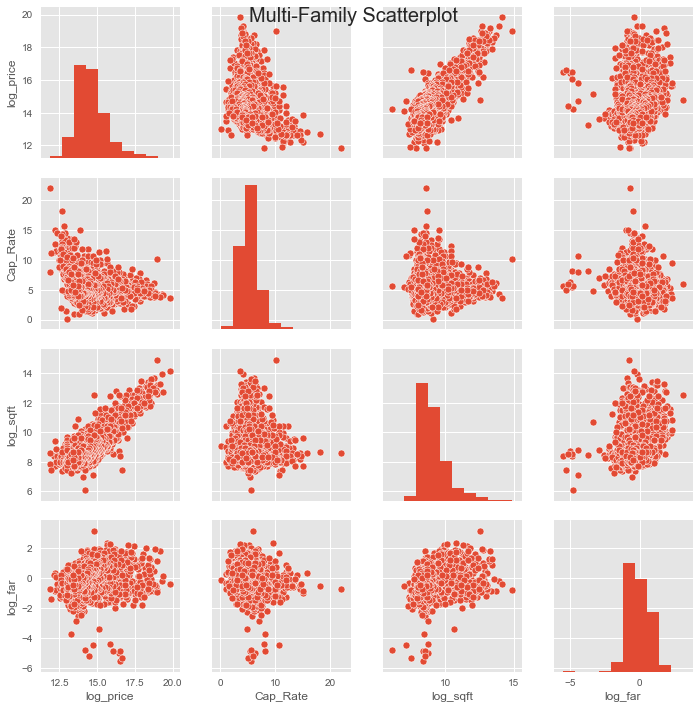

In [275]:
mfdf = df.loc[df['PropertyType'] == 'Multi-Family']
mfquant = mfdf[['log_price','Cap_Rate','log_sqft','log_far',]]
sb.pairplot(mfquant)
plt.suptitle('Multi-Family Scatterplot', size = 20)

In [ ]:
mfdf.isnull().sum()

In [ ]:
print (mfquant.corr())

In [ ]:
mf_data = mfquant.ix[:,(1,2,3)].values
mf_target = mfquant.ix[:,0].values
mf_data_names = ['Cap','Sqft','FAR']
x, y = scale(mf_data), mf_target
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)
print (LinReg.score(x,y))

In [ ]:
RFE(LinReg,3)
estimator = SVR(kernel='linear')
selector = RFE(estimator, 5, step=1)
selector = selector.fit(x,y)
selector.support_
selector.ranking_

In [ ]:
rdf = df.loc[df['PropertyType'] == 'Retail']
rquant = rdf[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(rquant)
plt.suptitle('Retail Scatterplot', size = 20)

In [ ]:
print(rquant.corr())

In [ ]:
retail_data = rquant.ix[:,(1,2,3)].values
retail_target = rquant.ix[:,0].values
retail_data_names = ['Cap','Sqft','FAR']
x, y = scale(retail_data), retail_target
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)
print (LinReg.score(x,y))

In [ ]:
ofdf = df.loc[df['PropertyType'] == 'Office']
ofquant = ofdf[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(ofquant)
plt.suptitle('Office Scatterplot', size = 20)

In [ ]:
print(ofquant.corr())

In [ ]:
office_data = ofquant.ix[:,(1,2,3)].values
office_target = ofquant.ix[:,0].values
office_data_names = ['Cap','Sqft','FAR']
x, y = scale(office_data), office_target
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)
print (LinReg.score(x,y))

In [ ]:
indf = df.loc[df['PropertyType'] == 'Industrial']
inquant = indf[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(inquant)
plt.suptitle('Industrial Scatterplot', size = 20)

In [ ]:
print(inquant.corr())

In [ ]:
# Missing Values?
miss_val = x==np.NAN
x[miss_val == True]

### Logistic Regression
- Predict the value of a numeric categorical variable based on its relationship with independent variables
Assumptions
- Data has no missing values
- Dependent variable is *binary* or *orindal*
- X variables are independent
- at least 50 observations per X variable

data = df.ix[:,(columns)].values
col_names = ['name1','name2']
y = data.ix[:,column].values

#### Checking independencies
sb.regplot(x='column',y='other x variable', data = df, scatter=True)
